# Explore Relationships & Trends

1. Correlations
2. Scatterplots
3. Pair Plots
4. Categorical Plots

In [70]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [71]:
# setup path to original dataset
path = r"/Users/patel/Documents/CF-Data Anaylst Course/portfolio_projects/mbs_analysis/datasets/"

df_service_level_1 = pd.read_pickle(
    os.path.join(path, "clean_datasets/2014_22_mbs_census_service_level_1_pivot.pkl")
)
df_service_level_1.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14877 entries, 0 to 140822
Data columns (total 125 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    key_x                                      object 
 1    Year                                       int64  
 2    StateTerritory                             object 
 3    GeographicCode                             object 
 4    GeographicAreaName                         object 
 5    GeographicGroup                            object 
 6    ServiceLevel                               object 
 7    Service                                    object 
 8    %_People_had_service_0-24                  float64
 9    %_People_had_service_25-44                 float64
 10   %_People_had_service_45-64                 float64
 11   %_People_had_service_65+                   float64
 12   %_People_had_service_All persons           float64
 13   %_People_had_service_Females

## Correlations

### Correlations in MBS Datasets

Questions:

1. Is there a relationship between:
    - No of service and no of patients (expected = Yes)
    - Providers Fees & Out of pocket cost per person (expected = Yes)
    - Total Medicare Benefits & Out of pocket cost per person (expected = Yes)
    - Year & No of patients (expected Yes)
    - Year & % of People who received a service (expected = Yes)
    - No of patient and No_of_service_per_person_All persons (Yes)

In [72]:
all_person = df_service_level_1[
    [
        "Year",
        "%_People_had_service_All persons",
        "No_of_patients_All persons",
        "No_of_service_per_person_All persons",
        "Out_of_pocket_cost_per_person_All persons",
        "Out_of_pocket_cost_%_All persons",
        "Total_mbs_paid_$_All persons",
        "Total_provider_fees_$_All persons",
    ]
]

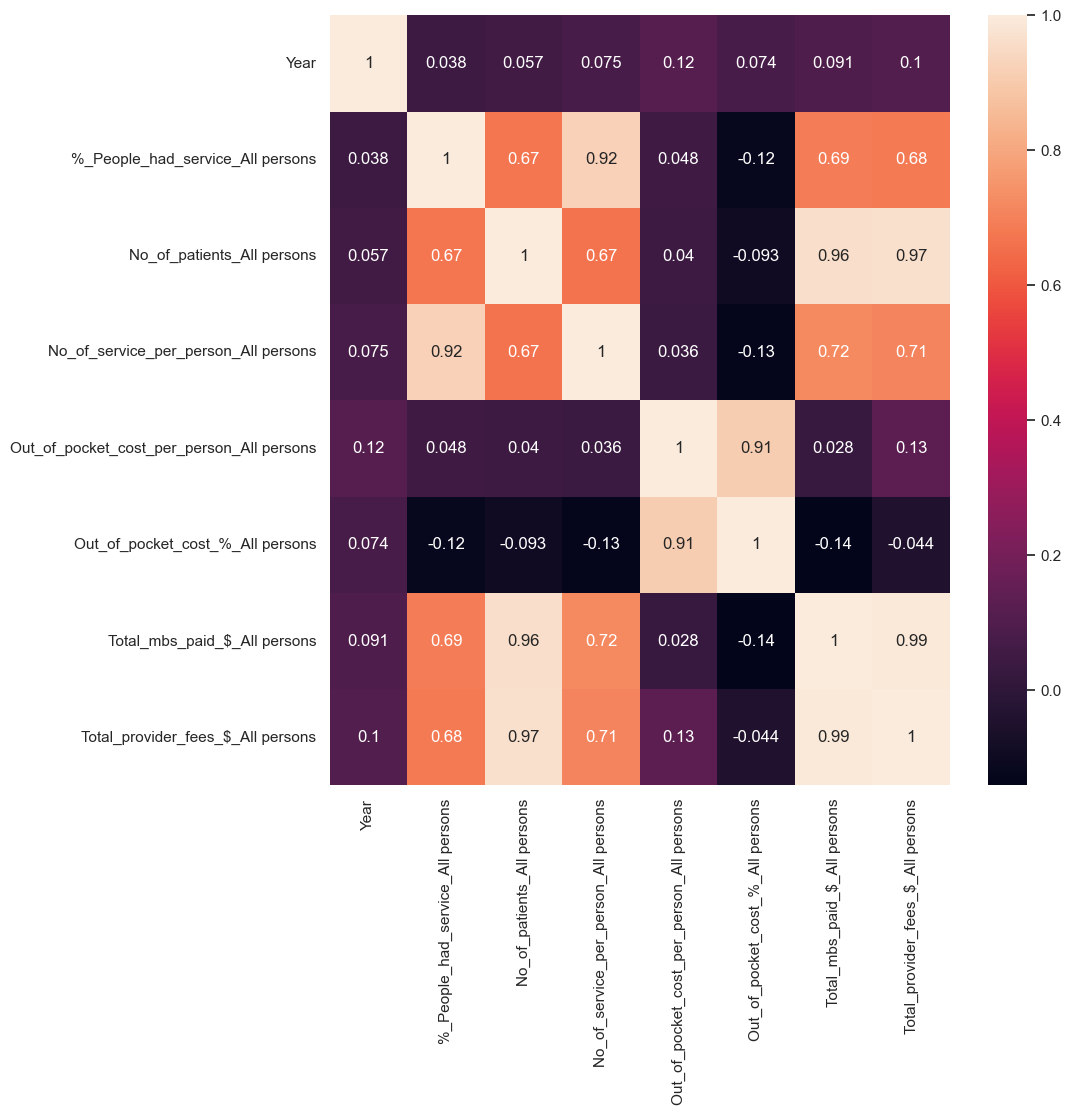

In [73]:
# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(10, 10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(
    all_person.corr(), annot=True, ax=ax
)  # The `annot` argument allows the plot to
# place the correlation coefficients onto the heatmap.

Results:

1. Weak relationships
    - Year & Total Provider Feeds (0.1)
    - Year & Out of pocket cost per person (0.12)
    - Providers Fees & Out of pocket cost per person (0.13)
    - % of out of pocket paid & Total mbs paid $ (-0.13)
    - % of out of pocket cost & % of people who had the service (-0.12)
    - % of out of pocket cost & no of service per person (-0.13)
    
2. Strong Relationship
    - No of service and no of patients (0.67)
    - % of people who had the service & no of service per person (0.94)
    - % of people who had the service & Provider fees (0.68)
    - % of people who had the service & MBS benefit paid (0.69)
    - No of patients & No of services per person (0.67)


3. no relationship
    - Year & % of People who received a service
    - Total Medicare Benefits & Out of pocket cost per person (0.027)
    - Year & No of patients (0.058)

Trends:
1. As years progress from 2014-22, total provider fees also increases
2. As years progress from 2014-22, out of pocket per person increases per person
3. As provider fees has increases, out of pocket cost per person increases
4. As % of out of pocket cost has increases, MBS paid has reduces
5. As % of out of pocket cost increases, % of people who had the service decreases
6. As % of out of pocket cost increases, no of services per person decreases

### Gender Correlations

Questions:

1. Is there a relationship between 
    - Provider fees and out of pocket cost per person (by gender)
    - Year and No of patients by gender
    - Year and No of service by gender
    - Year and Services_100_people
    - Year and out of pocket costs

In [74]:
gender = df_service_level_1[
    [
        "Year",
        "Out_of_pocket_cost_per_person_Females",
        "Out_of_pocket_cost_per_person_Males",
        "Total_provider_fees_$_Females",
        "Total_provider_fees_$_Males",
        "Out_of_pocket_cost_%_Females",
        "Out_of_pocket_cost_%_Males",
        "No_of_patients_Females",
        "No_of_patients_Males",
        "No_of_services_Females",
        "No_of_patients_Males",
        "No_of_services_Males",
        "Services_100_people_Females",
        "Services_100_people_Males",
    ]
]

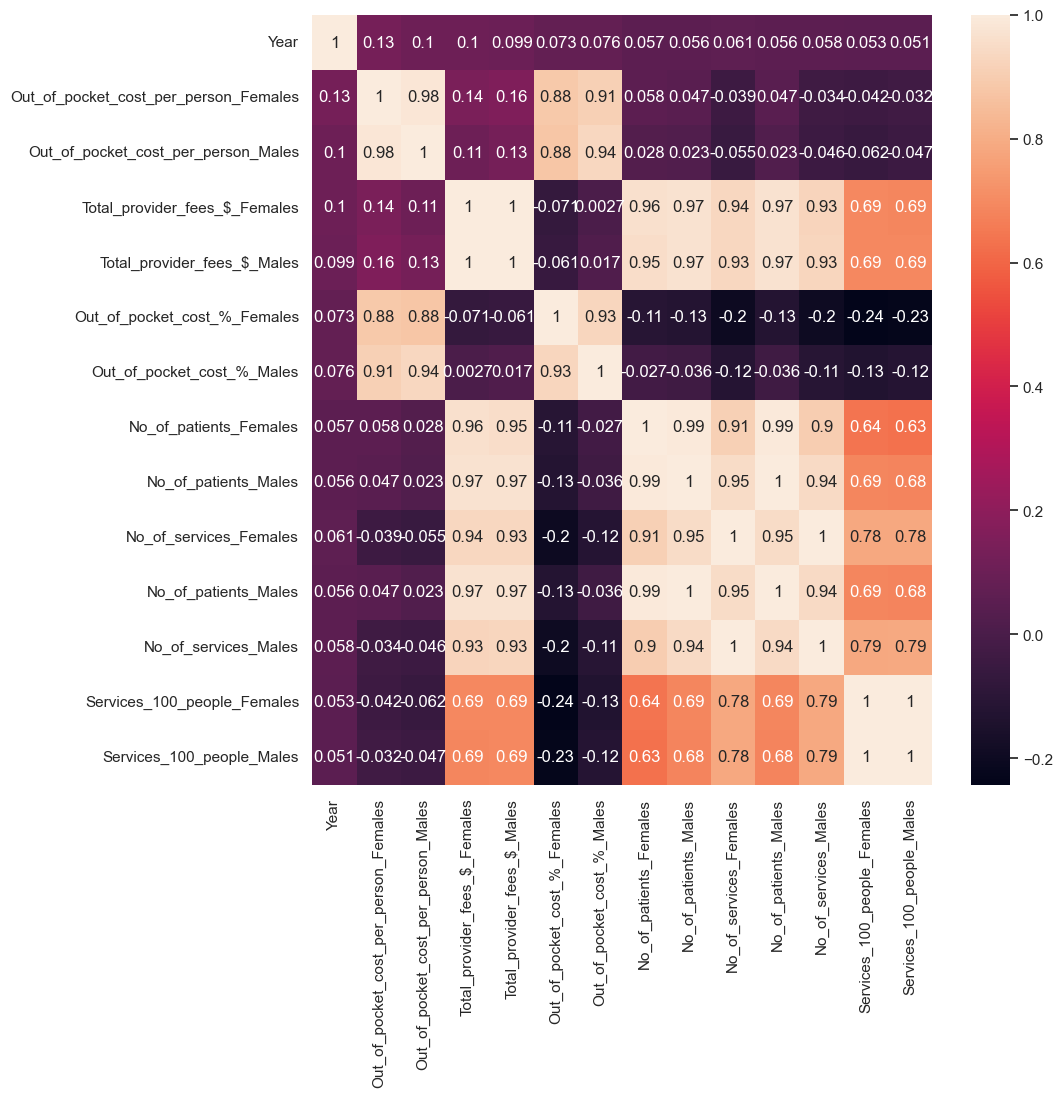

In [75]:
# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(10, 10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(
    gender.corr(), annot=True, ax=ax
)  # The `annot` argument allows the plot to
# place the correlation coefficients onto the heatmap.

Results:
1. Weak Correlation
    - Year & out of pocket cost per person Male (0.1), female (0.13)
    - Year & provider fees male (0.1), female (0.11)
    - Provider fees & out of pocket cost male (0.16), female (0.14)
    - No of patient & Out of pocket cost % females (-0.12) (no to very weak correlation for males patients
    - Out of pocket_% increases, services_per_100 reduces females (-0.23), males(-0.12)

2. No correlation:
    Year & no of patients, services

Trends to Confirm with PairPlots:

1. As years progress from 2014-22, out of pocket cost per person increases for both gender. Female has a stronger correlation
2. As years progress from 2014-22, provider fees for both genders increases
3. As provider fees increases, out of pocket costs per person for both genders increases. Make has strong correlation
4. As out of pocket costs % increases for females, number of females patients reduces. No noticeble trend for males
5. As % of out of pocket costs of provider fees increases, services per 100 reduces. 

### Income

Questions:
1. Is there correlation between % of out of pocket of avg income and population
2. Is there a correlation between year and % out of pocket of income

In [76]:
income_1 = df_service_level_1[
    [
        "Year",
        "%_out_of_pocket_by_$5200",
        "%_out_of_pocket_by_$13000",
        "%_out_of_pocket_by_$18200",
        "%_out_of_pocket_by_$26000",
        "%_out_of_pocket_by_$36400",
        "%_out_of_pocket_by_$46800",
        "average_income_$5200",
        "average_income_$13000",
        "average_income_$18200",
        "average_income_$26000",
        "average_income_$36400",
        "average_income_$46800",
    ]
]
income_1

Year  %_out_of_pocket_by_$5200  %_out_of_pocket_by_$13000  \
0       2014                  0.437320                   0.174928   
1       2014                  1.707366                   0.682946   
2       2014                  1.594093                   0.637637   
3       2014                  0.001194                   0.000477   
4       2014                  2.386403                   0.954561   
...      ...                       ...                        ...   
140789  2022                  2.040220                   0.816088   
140790  2022                  0.397246                   0.158898   
140791  2022                  4.072812                   1.629125   
140821  2022                  0.000000                   0.000000   
140822  2022                  0.000000                   0.000000   

        %_out_of_pocket_by_$18200  %_out_of_pocket_by_$26000  \
0                        0.124948                   0.087464   
1                        0.487819                   0.341473   
2                        0.455455                   0.318819   
3                        0.000341                   0.000239   
4                        0.681829                   0.477281   
...                           ...                        ...   
140789                   0.582920                   0.408044   
140790                   0.113499                   0.079449   
140791                   1.163661                   0.814562   
140821                   0.000000                   0.000000   
140822                   0.000000                   0.000000   

        %_out_of_pocket_by_$36400  %_out_of_pocket_by_$46800  \
0                        0.062474                   0.048591   
1                        0.243909                   0.189707   
2                        0.227728                   0.177121   
3                        0.000171                   0.000133   
4                        0.340915                   0.265156   
...                           ...                        ...   
140789                   0.291460                   0.226691   
140790                   0.056749                   0.044138   
140791                   0.581830                   0.452535   
140821                   0.000000                   0.000000   
140822                   0.000000                   0.000000   

        average_income_$5200  average_income_$13000  average_income_$18200  \
0                       2013                   2376                   2815   
1                       2013                   2376                   2815   
2                       2013                   2376                   2815   
3                       2013                   2376                   2815   
4                       2013                   2376                   2815   
...                      ...                    ...                    ...   
140789                   181                    192                    215   
140790                   181                    192                    215   
140791                   181                    192                    215   
140821                    35                     25                     54   
140822                     8                     23                     43   

        average_income_$26000  average_income_$36400  average_income_$46800  
0                        4824                   3607                   3896  
1                        4824                   3607                   3896  
2                        4824                   3607                   3896  
3                        4824                   3607                   3896  
4                        4824                   3607                   3896  
...                       ...                    ...                    ...  
140789                    532                    375                    591  
140790                    532                    375                    591  
14

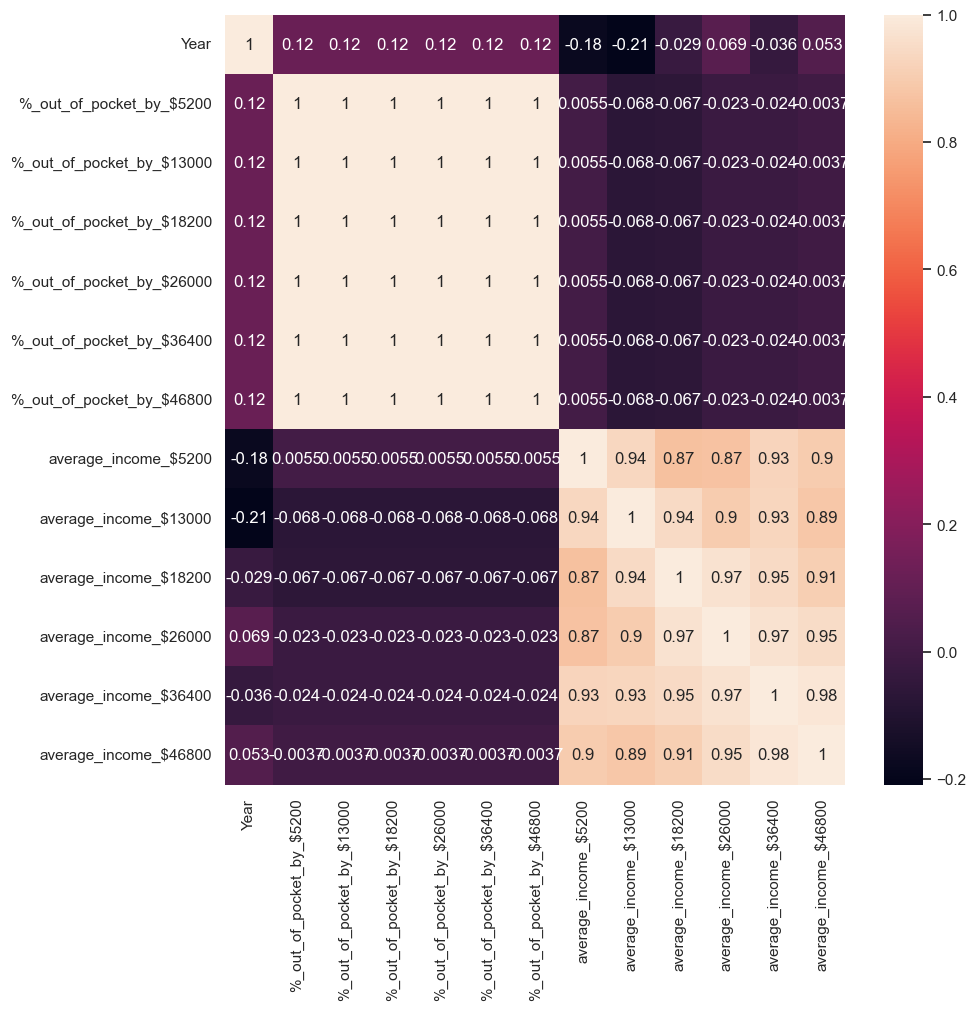

In [77]:
# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(10, 10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(
    income_1.corr(), annot=True, ax=ax
)  # The `annot` argument allows the plot to
# place the correlation coefficients onto the heatmap.

In [78]:
income_2 = df_service_level_1[
    [
        "Year",
        "%_out_of_pocket_by_$58500",
        "%_out_of_pocket_by_$71500",
        "%_out_of_pocket_by_$91000",
        "%_out_of_pocket_by_$130000",
        "%_out_of_pocket_by_$169000+",
        "average_income_$58500",
        "average_income_$71500",
        "average_income_$91000",
        "average_income_$130000",
        "average_income_$169000+",
    ]
]

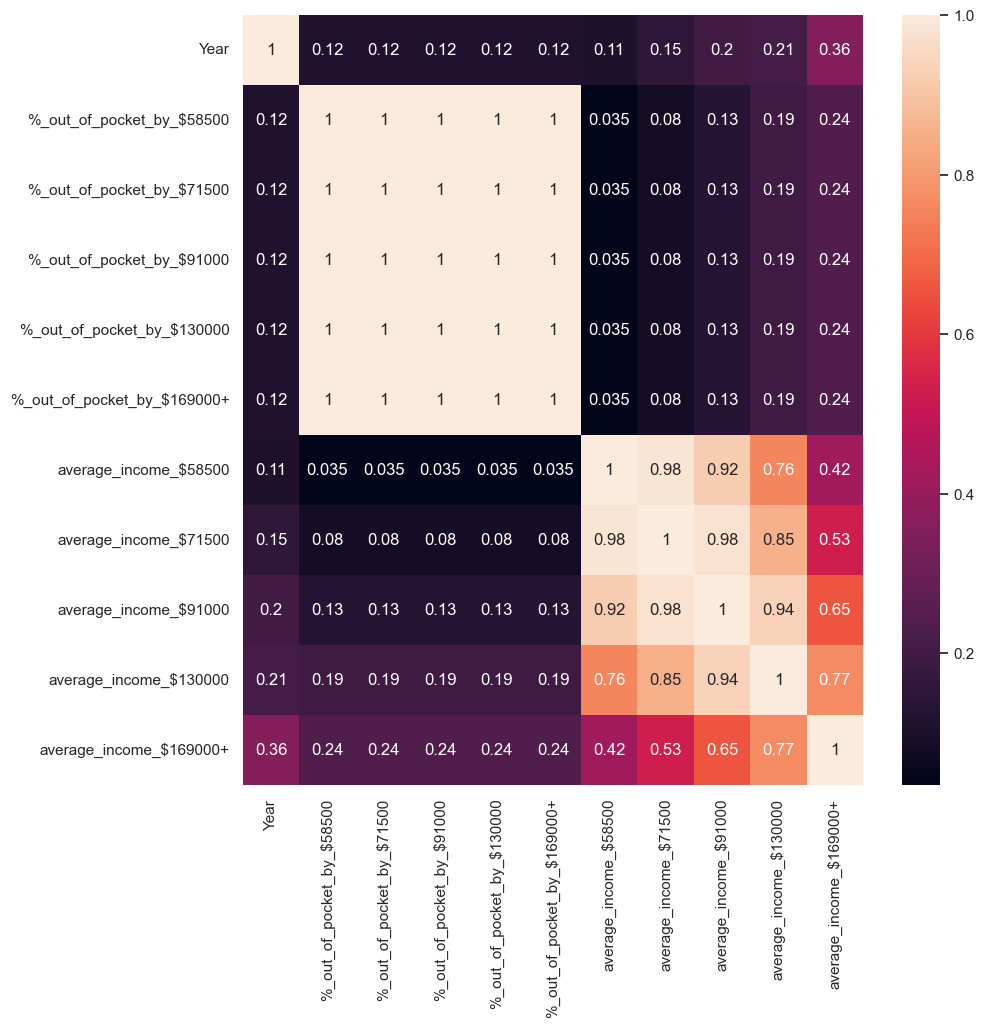

In [79]:
# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(10, 10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(
    income_2.corr(), annot=True, ax=ax
)  # The `annot` argument allows the plot to
# place the correlation coefficients onto the heatmap.

Results

1. Weak Relaionships
    - Year & out of pocket % by income (0.11)
    - Population Income 91,000+ & % out of pocket (0.13-0.24)
    - Year & population of incomes $5200 and $13,000 -> (-0.17), (-0.2)
    - Year & Population of incomes $58,500 -> $169000+ (0.11 - 0.21)

Trends:

1. As year progresses from 2014-22, % out of pocket increases
2. As population of higher income increases,  % of out of pocket increases
3. As years progressed population of avg income $5,200 and $13,000 reduced


## Scatterplots

In [80]:
df_service_level_1[["Year", "Out_of_pocket_cost_per_person_All persons"]].dtypes

Year                                           int64
Out_of_pocket_cost_per_person_All persons    float64
dtype: object

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


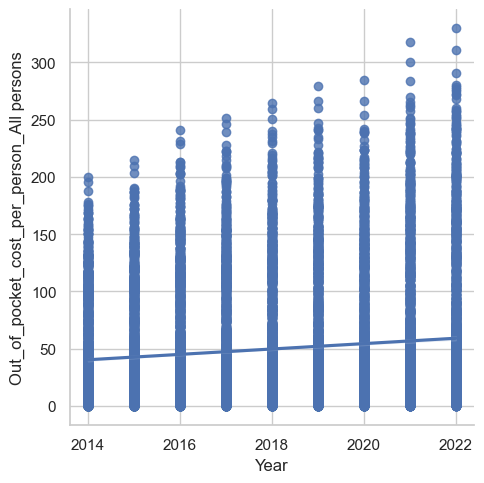

In [81]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn

sns.lmplot(
    x="Year", y="Out_of_pocket_cost_per_person_All persons", data=df_service_level_1
)

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


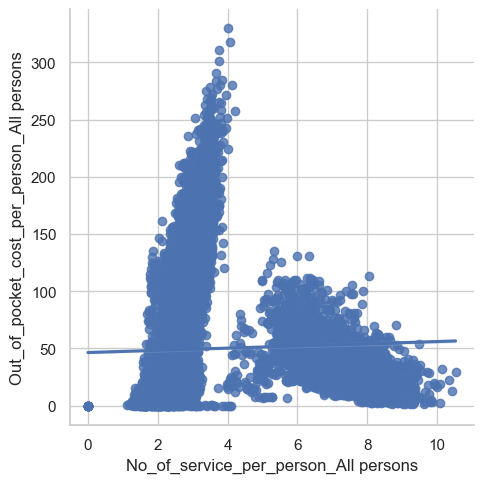

In [82]:
sns.lmplot(
    x="No_of_service_per_person_All persons",
    y="Out_of_pocket_cost_per_person_All persons",
    data=df_service_level_1,
)

From 2014 to 2022, the range of out of pocket fees has increases. In 2021 to 2022, there are instances of patients paying more $300 out of pocket. There is a trend of increase in out of pocket fees

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


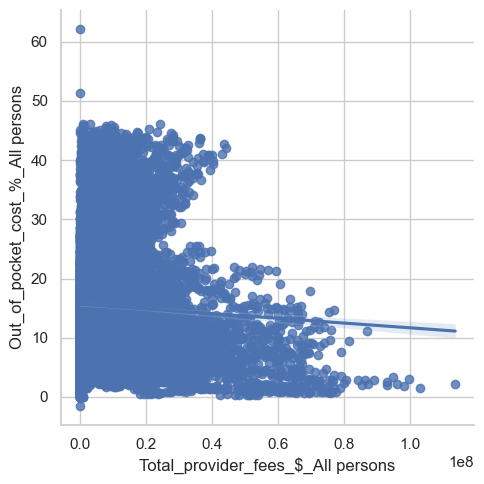

In [83]:
sns.lmplot(
    x="Total_provider_fees_$_All persons",
    y="Out_of_pocket_cost_%_All persons",
    data=df_service_level_1,
)

In [84]:
df_service_level_1.loc[
    df_service_level_1["Out_of_pocket_cost_%_All persons"] > 50,
    [
        "Year",
        "StateTerritory",
        "GeographicCode",
        "GeographicAreaName",
        "Service",
        "Total_provider_fees_$_All persons",
        "Total_mbs_paid_$_All persons",
        "Out_of_Pocket_All persons",
        "Out_of_pocket_cost_%_All persons",
    ],
]

Year StateTerritory GeographicCode       GeographicAreaName  \
2446  2014            NSW          11801  Eastern Suburbs - North   
3068  2014            NSW          12201                    Manly   

                                            Service  \
2446  Nursing and Aboriginal Health Workers (total)   
3068  Nursing and Aboriginal Health Workers (total)   

      Total_provider_fees_$_All persons  Total_mbs_paid_$_All persons  \
2446                            43737.0                       21267.0   
3068                            54477.0                       20614.0   

      Out_of_Pocket_All persons  Out_of_pocket_cost_%_All persons  
2446                    22470.0                         51.375266  
3068                    33863.0                         62.160178

In [85]:
df_service_level_1.loc[
    df_service_level_1["Total_provider_fees_$_All persons"] > 100000000,
    [
        "Year",
        "StateTerritory",
        "GeographicCode",
        "GeographicAreaName",
        "Service",
        "total_population",
        "No_of_patients_All persons",
        "%_People_had_service_All persons",
        "Total_provider_fees_$_All persons",
        "Total_mbs_paid_$_All persons",
        "Out_of_Pocket_All persons",
        "Out_of_pocket_cost_%_All persons",
    ],
]

Year StateTerritory GeographicCode GeographicAreaName  \
115496  2021            Vic          21305            Wyndham   
131840  2022            Vic          21305            Wyndham   

                       Service  total_population  No_of_patients_All persons  \
115496  GP attendances (total)            296748                      244586   
131840  GP attendances (total)            296748                      272181   

        %_People_had_service_All persons  Total_provider_fees_$_All persons  \
115496                             84.70                        103166272.0   
131840                             90.42                        113841625.0   

        Total_mbs_paid_$_All persons  Out_of_Pocket_All persons  \
115496                   101538957.0                  1627315.0   
131840                   111399915.0                  2441710.0   

        Out_of_pocket_cost_%_All persons  
115496                          1.577371  
131840                          2.144831

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


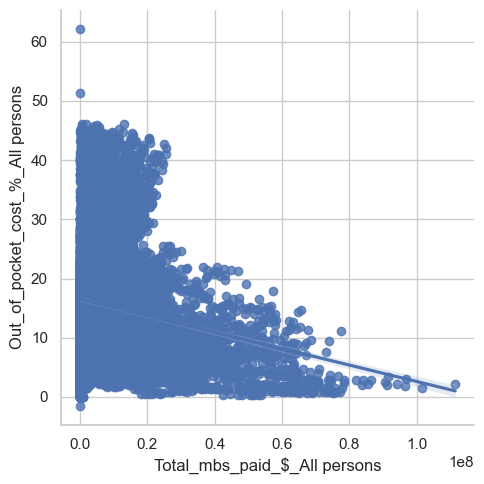

In [86]:
sns.lmplot(
    x="Total_mbs_paid_$_All persons",
    y="Out_of_pocket_cost_%_All persons",
    data=df_service_level_1,
)

## Pair Plots

### Correlations within MBS

In [87]:
columns_with_all_person = [
    col for col in df_service_level_1.columns if col.endswith("_All persons")
]
columns_with_all_person

['%_People_had_service_All persons',
 'ERP_All persons',
 'MBS_per_100_All persons',
 'No_of_patients_All persons',
 'No_of_service_per_person_All persons',
 'No_of_services_All persons',
 'Out_of_Pocket_All persons',
 'Out_of_pocket_cost_%_All persons',
 'Out_of_pocket_cost_per_person_All persons',
 'Services_100_people_All persons',
 'Total_mbs_paid_$_All persons',
 'Total_provider_fees_$_All persons']

Year, Total provider fees, out of pocket per person, % out of pocket, % people use the service, no of services per person

In [88]:
df_service_level_1

key_x  Year     StateTerritory GeographicCode  \
0       2014-10102  2014                NSW          10102   
1       2014-10102  2014                NSW          10102   
2       2014-10102  2014                NSW          10102   
3       2014-10102  2014                NSW          10102   
4       2014-10102  2014                NSW          10102   
...            ...   ...                ...            ...   
140789  2022-80110  2022                ACT          80110   
140790  2022-80110  2022                ACT          80110   
140791  2022-80110  2022                ACT          80110   
140821  2022-90101  2022  Other Territories          90101   
140822  2022-90102  2022  Other Territories          90102   

             GeographicAreaName             GeographicGroup ServiceLevel  \
0                    Queanbeyan   Major cities - higher SES      Level 1   
1                    Queanbeyan   Major cities - higher SES      Level 1   
2                    Queanbeyan   Major cities - higher SES      Level 1   
3                    Queanbeyan   Major cities - higher SES      Level 1   
4                    Queanbeyan   Major cities - higher SES      Level 1   
...                         ...                         ...          ...   
140789                 Molonglo   Major cities - higher SES      Level 1   
140790                 Molonglo   Major cities - higher SES      Level 1   
140791                 Molonglo   Major cities - higher SES      Level 1   
140821         Christmas Island  Remote (incl. very remote)      Level 1   
140822  Cocos (Keeling) Islands  Remote (incl. very remote)      Level 1   

                                              Service  \
0                   Allied Health attendances (total)   
1                          Diagnostic Imaging (total)   
2                              GP attendances (total)   
3       Nursing and Aboriginal Health Workers (total)   
4                      Specialist attendances (total)   
...                                               ...   
140789                         GP attendances (total)   
140790  Nursing and Aboriginal Health Workers (total)   
140791                 Specialist attendances (total)   
140821  Nursing and Aboriginal Health Workers (total)   
140822  Nursing and Aboriginal Health Workers (total)   

        %_People_had_service_0-24  %_People_had_service_25-44  ...  \
0                           18.80                       20.65  ...   
1                           17.59                       27.72  ...   
2                           76.02                       74.84  ...   
3                            1.14                        0.59  ...   
4                           14.60                       17.92  ...   
...                           ...                         ...  ...   
140789                       0.00                       27.76  ...   
140790                       0.00                        0.63  ...   
140791                       0.00                        7.74  ...   
140821                       0.00                        0.00  ...   
140822                       0.00                        0.00  ...   

        %_out_of_pocket_by_$13000  %_out_of_pocket_by_$18200  \
0                        0.174928                   0.124948   
1                        0.682946                   0.487819   
2                        0.637637                   0.455455   
3                        0.000477                   0.000341   
4                        0.954561                   0.681829   
...                           ...                        ...   
140789                   0.816088                   0.582920   
140790                   0.158898                   0.113499   
140791                   1.629125                   1.163661   
140821                   0.000000                   0.000000   
140822                   0.000000                   0.000000   

        %_out_of_pocket_by_$26000  %_out_of_pocket_by_$36400

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequence

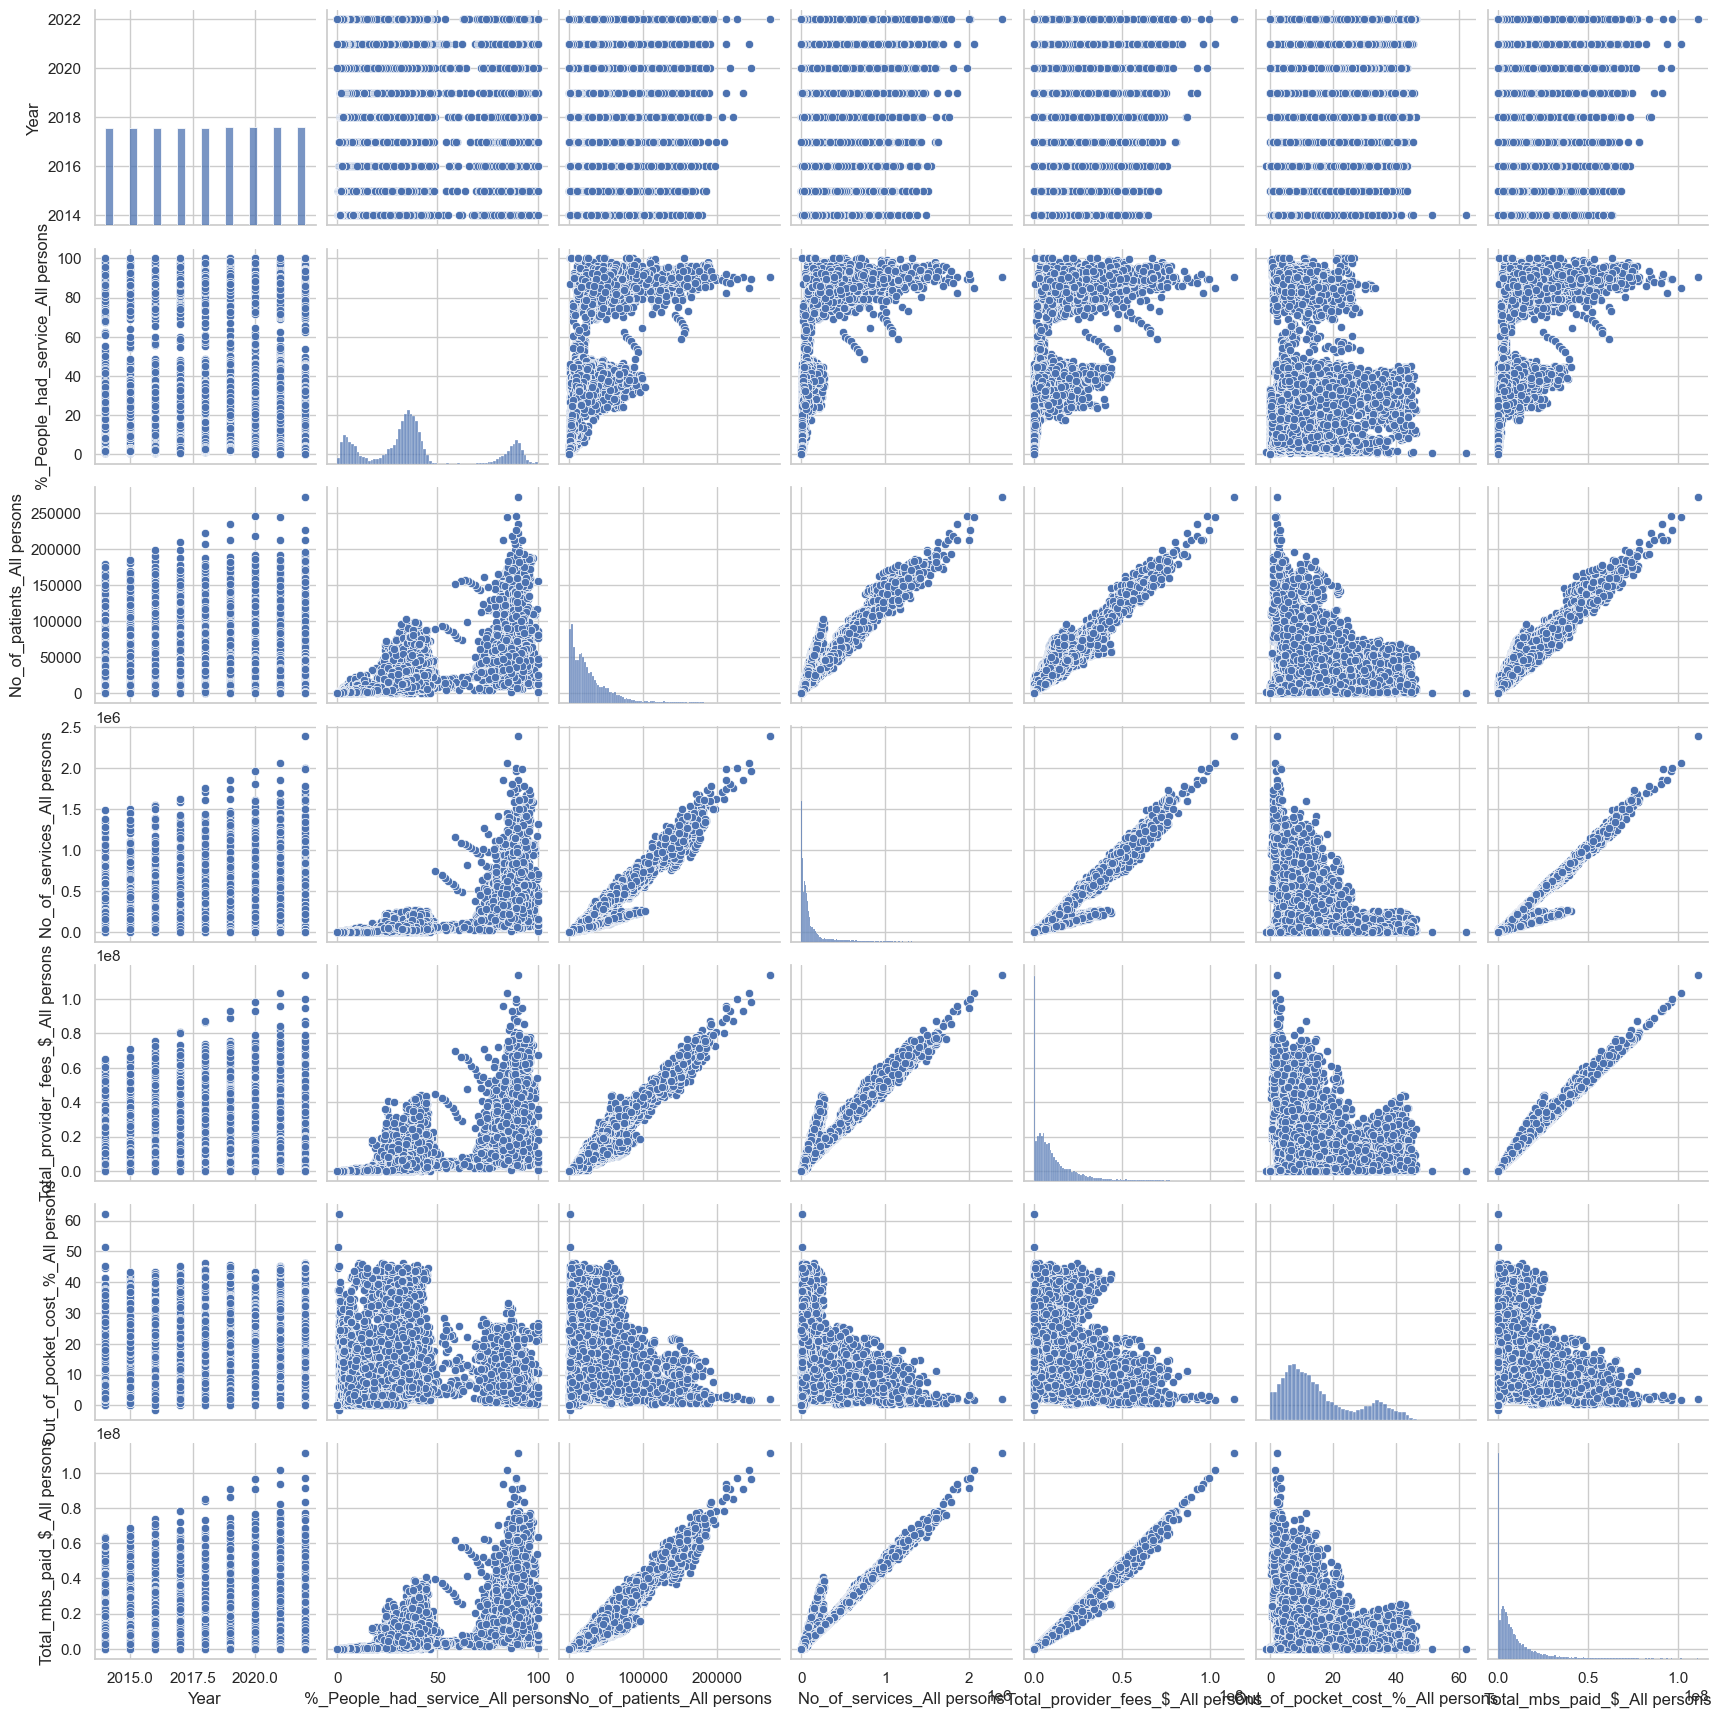

In [89]:
all_person_pp = df_service_level_1[
    [
        "Year",
        "%_People_had_service_All persons",
        "No_of_patients_All persons",
        "No_of_services_All persons",
        "Total_provider_fees_$_All persons",
        "Out_of_pocket_cost_%_All persons",
        "Total_mbs_paid_$_All persons",
    ]
]
pp_all_person = sns.pairplot(all_person_pp)

Observations 

Year:
1. No of patients has increased
2. No of services has increased
3. Total Provdider fees has increased
4. Out of pocket fees has increased

% of people who had the service (areas specific)
1. There are 20% - 50% of people who use the service in specific areas pay unusually high out of pocket (Investigate)
2. There are 20% - 50% of people who use the service in specific areas recieve unusually low MBS paid (Investigate)
3. There are 20% - 50% of people who use the service in specific areas have lower provider fees (Investigate)

No of patients
1. Total Out of pocket cost is higher for small number of patients
2. Total Out of pocket cost is higher for small number of services
3. No of services has increased

MBS paid
1. As number of services increases, MBS paid increases
2. Instances where low MBS payment results in high out of pocket cost. But this ranges from 0 to high so there is a weak relationship


In [90]:
columns_with_all_person = [
    col for col in df_service_level_1.columns if col.endswith("_All persons")
]
columns_with_all_person

['%_People_had_service_All persons',
 'ERP_All persons',
 'MBS_per_100_All persons',
 'No_of_patients_All persons',
 'No_of_service_per_person_All persons',
 'No_of_services_All persons',
 'Out_of_Pocket_All persons',
 'Out_of_pocket_cost_%_All persons',
 'Out_of_pocket_cost_per_person_All persons',
 'Services_100_people_All persons',
 'Total_mbs_paid_$_All persons',
 'Total_provider_fees_$_All persons']

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


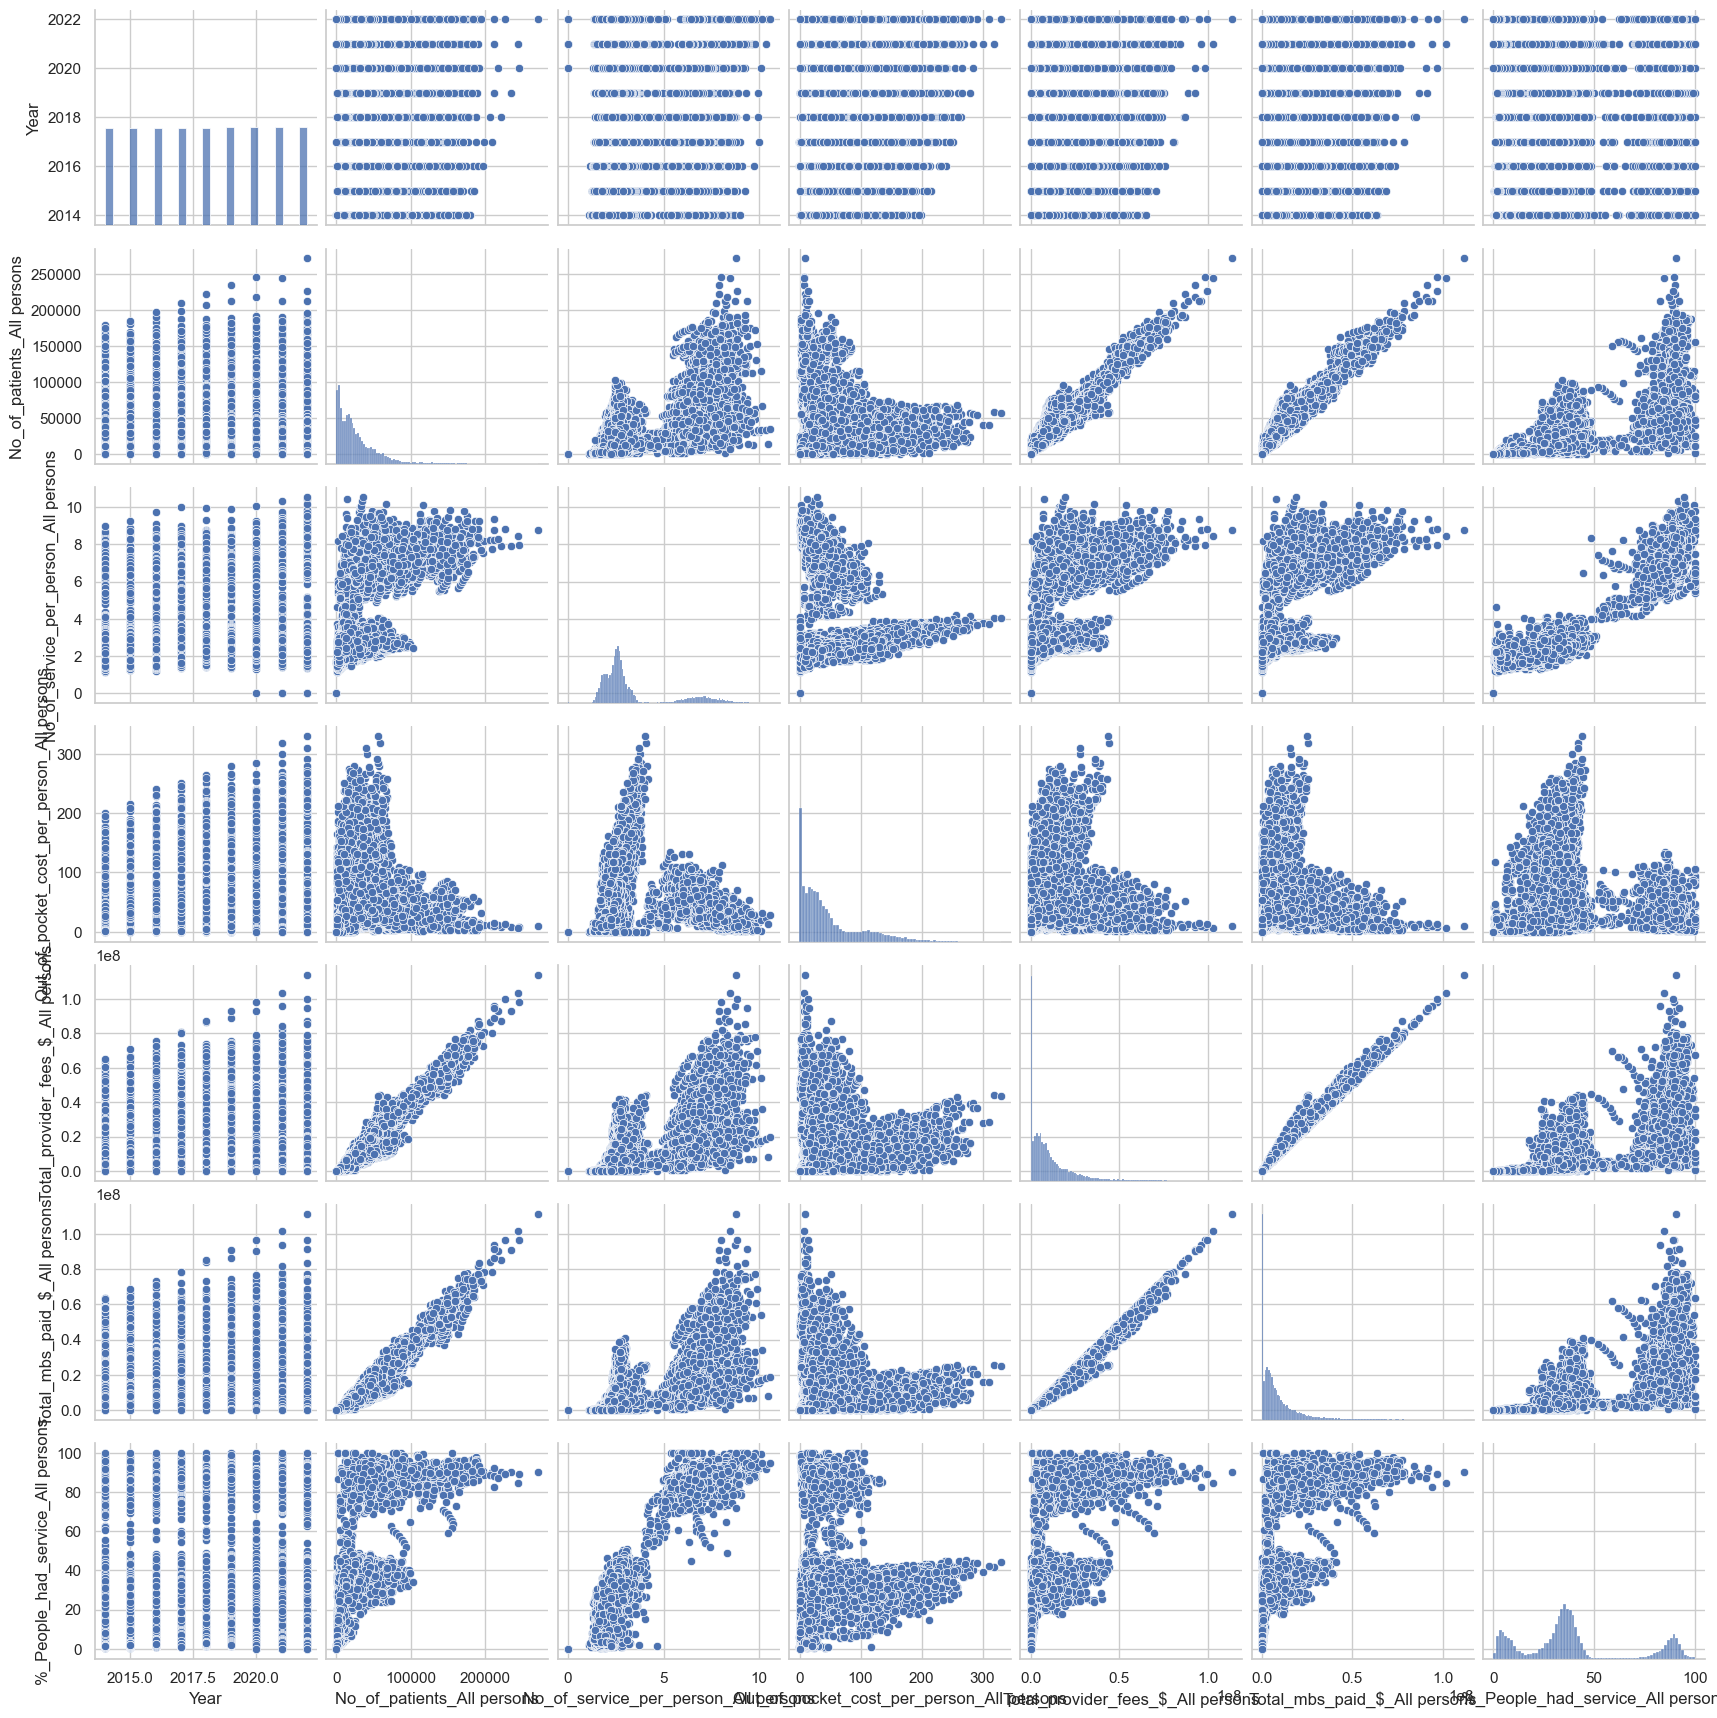

In [91]:
per_person_pp = df_service_level_1[
    [
        "Year",
        "No_of_patients_All persons",
        "No_of_service_per_person_All persons",
        "Out_of_pocket_cost_per_person_All persons",
        "Total_provider_fees_$_All persons",
        "Total_mbs_paid_$_All persons",
        "%_People_had_service_All persons",
    ]
]
pp_per_person = sns.pairplot(per_person_pp)

Trends Reviewed:
1. As years progress from 2014-22, total provider fees also increases (confirmed)
2. As years progress from 2014-22, out of pocket per person increases per person (confirmed)
3. As provider fees increases, out of pocket cost per person increases (not true, forms into groups)
4. As % of out of pocket cost has increases, MBS paid has reduces (not really, % OOP ranges for low MBS payment)
5. As % of out of pocket cost increases, % of people who had the service decreases (not really, forms 2 groups)
6. As % of out of pocket cost increases, no of services per person decreases (not really, forms 2 groups)

### Income

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


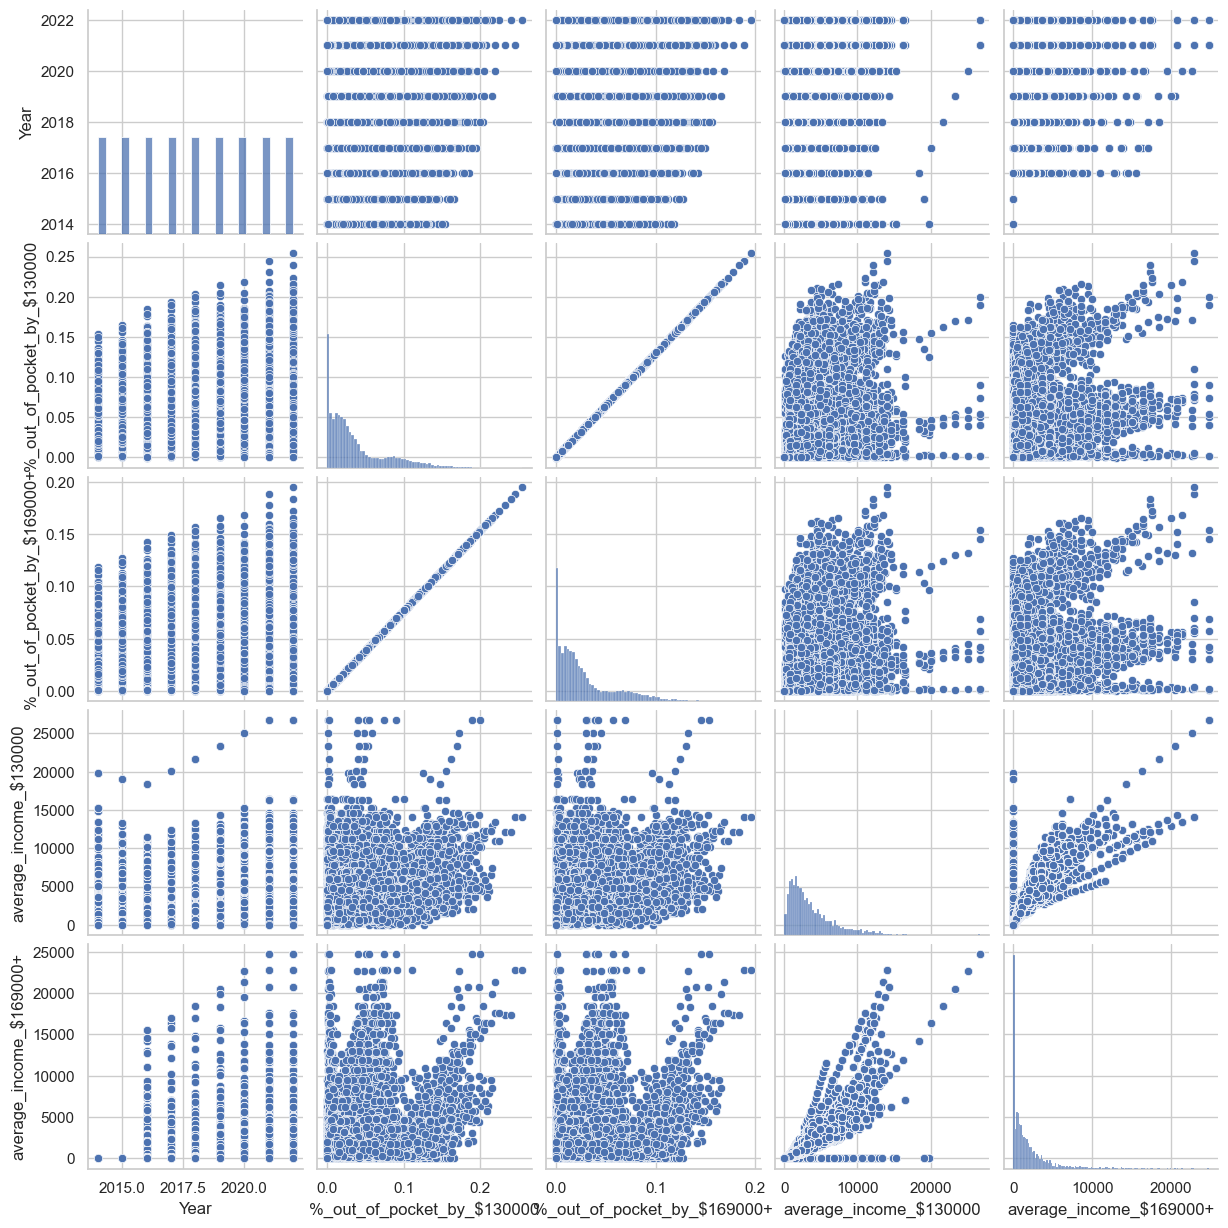

In [92]:
income_pop = df_service_level_1[
    [
        "Year",
        "%_out_of_pocket_by_$130000",
        "%_out_of_pocket_by_$169000+",
        "average_income_$130000",
        "average_income_$169000+",
    ]
]
income_pop = sns.pairplot(income_pop)

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


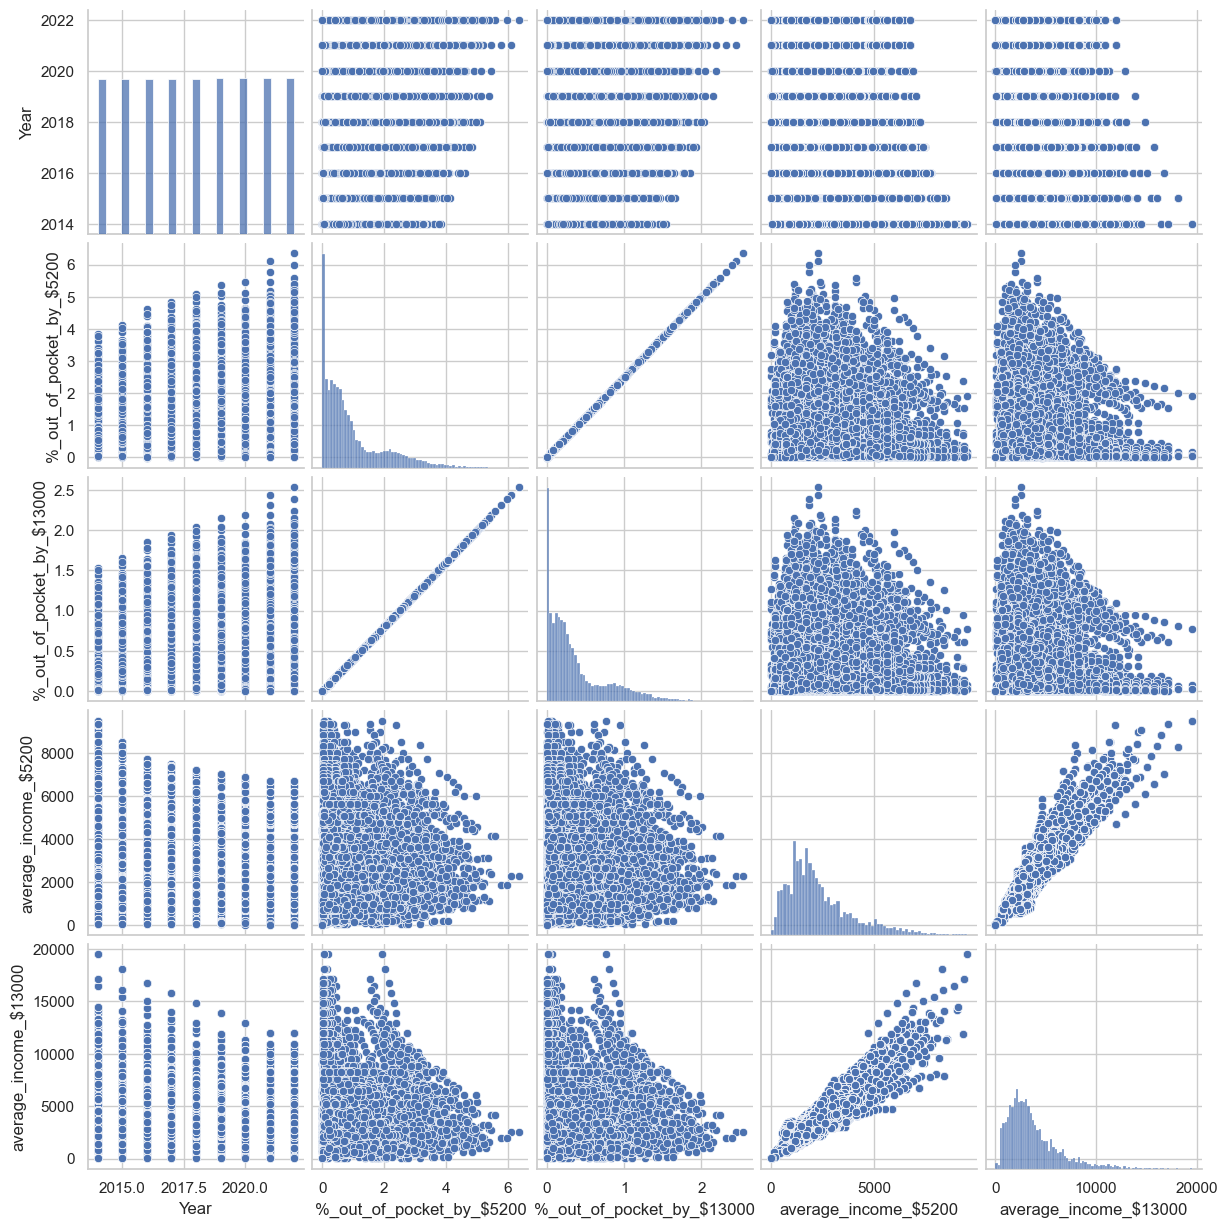

In [93]:
income_pop_2 = df_service_level_1[
    [
        "Year",
        "%_out_of_pocket_by_$5200",
        "%_out_of_pocket_by_$13000",
        "average_income_$5200",
        "average_income_$13000",
    ]
]
income_pop_2 = sns.pairplot(income_pop_2)

Trends Reviewed

1. As year progresses from 2014-22, % out of pocket increases (confirmed)
2. As population of higher income increases,  % of out of pocket increases (not true)
3. As years progressed population of avg income $5,200 and $13,000 reduced (confirmed)


## Categorical Plots

### Cost Burden Category

Cost of burden shows financial burden on a person per year for using medicare services. This is not relative to the income.

Using out of pocket cost per person (by year) to determine the burden category

In [94]:
print(df_service_level_1["Out_of_pocket_cost_per_person_All persons"].mean())
print("---")
print(df_service_level_1["Out_of_pocket_cost_per_person_All persons"].quantile(0.25))
print(df_service_level_1["Out_of_pocket_cost_per_person_All persons"].quantile(0.5))
print(df_service_level_1["Out_of_pocket_cost_per_person_All persons"].quantile(0.75))

49.58291228117129
---
11.824503114802729
31.337749597804486
69.45301711197838


<Axes: xlabel='Out_of_pocket_cost_per_person_All persons', ylabel='Count'>

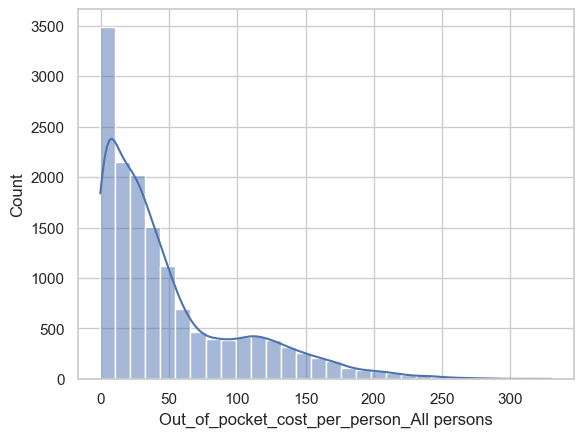

In [95]:
sns.histplot(
    df_service_level_1["Out_of_pocket_cost_per_person_All persons"], bins=30, kde=True
)

    Low Burden = 0-30
    Moderate Burden = 30-70
    High Burden = 70-120
    Severe Burden = 120+

In [96]:
df_service_level_1_new = df_service_level_1.copy()

In [97]:
# Low Burden to Patients (less than $30)
df_service_level_1_new.loc[
    df_service_level_1_new["Out_of_pocket_cost_per_person_All persons"] <= 30,
    "Cost_Burden",
] = "Low Burden"

# Moderate Burden ($30 to $70)
df_service_level_1_new.loc[
    (df_service_level_1_new["Out_of_pocket_cost_per_person_All persons"] > 30)
    & (df_service_level_1_new["Out_of_pocket_cost_per_person_All persons"] <= 70),
    "Cost_Burden",
] = "Moderate Burden"

# High Burden ($70 to $120)
df_service_level_1_new.loc[
    (df_service_level_1_new["Out_of_pocket_cost_per_person_All persons"] > 70)
    & (df_service_level_1_new["Out_of_pocket_cost_per_person_All persons"] <= 120),
    "Cost_Burden",
] = "High Burden"

# Severe Burden ($120+)
df_service_level_1_new.loc[
    df_service_level_1_new["Out_of_pocket_cost_per_person_All persons"] > 120,
    "Cost_Burden",
] = "Severe Burden"

In [98]:
df_service_level_1_new["Cost_Burden"].value_counts()

Low Burden         7231
Moderate Burden    3947
High Burden        1856
Severe Burden      1843
Name: Cost_Burden, dtype: int64

<Axes: xlabel='No_of_service_per_person_All persons', ylabel='Out_of_pocket_cost_per_person_All persons'>

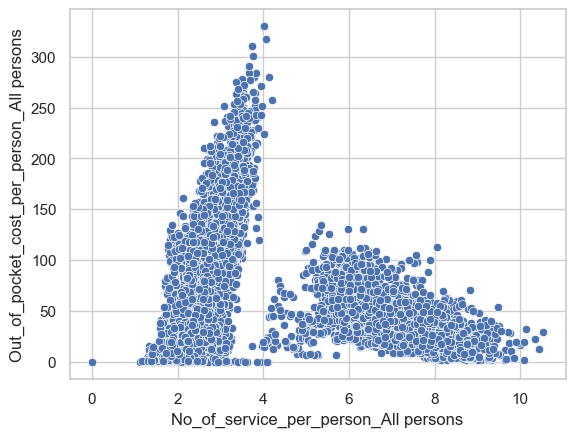

In [99]:
sns.scatterplot(
    x="No_of_service_per_person_All persons",
    y="Out_of_pocket_cost_per_person_All persons",
    data=df_service_level_1_new,
)

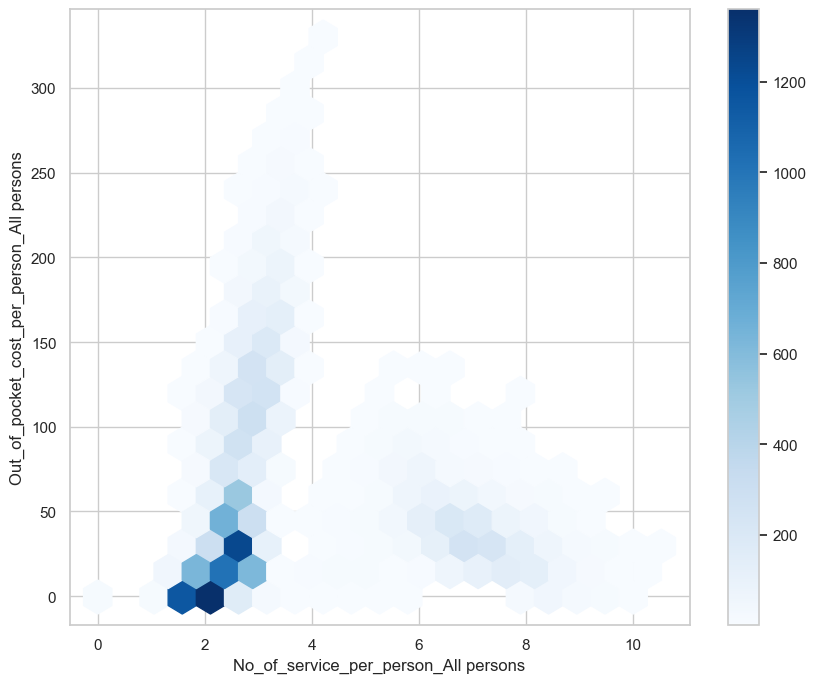

In [100]:
plt.figure(figsize=(10, 8))
plt.hexbin(
    df_service_level_1_new["No_of_service_per_person_All persons"],
    df_service_level_1_new["Out_of_pocket_cost_per_person_All persons"],
    gridsize=20,  # You can adjust the gridsize for more or less granularity
    cmap="Blues",
    mincnt=1,  # Only show hexagons with at least 1 point in them
)
plt.colorbar()
plt.xlabel("No_of_service_per_person_All persons")
plt.ylabel("Out_of_pocket_cost_per_person_All persons")
plt.show()

In [101]:
# Create a categorical plot in seaborn to compare no of patients using number of services a year by cost. Checking to see if there is any relationship with Cost of Burden category

""" sns.set(style="ticks")
g = sns.catplot(
    x="No_of_service_per_person_All persons",
    y="Out_of_pocket_cost_per_person_All persons",
    hue="Cost_Burden",
    data=df_service_level_1_new,
    kind="strip",
) """

' sns.set(style="ticks")\ng = sns.catplot(\n    x="No_of_service_per_person_All persons",\n    y="Out_of_pocket_cost_per_person_All persons",\n    hue="Cost_Burden",\n    data=df_service_level_1_new,\n    kind="strip",\n) '

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


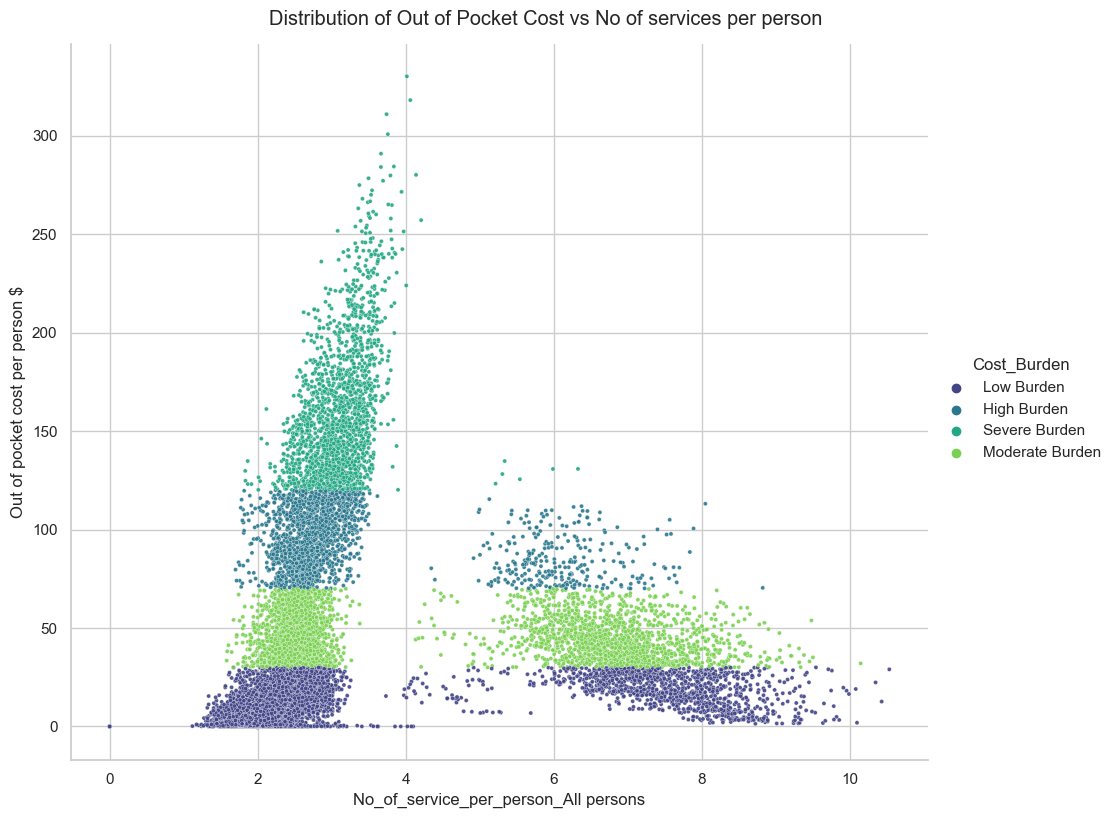

In [102]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the relplot
g = sns.relplot(
    data=df_service_level_1_new,
    x="No_of_service_per_person_All persons",
    y="Out_of_pocket_cost_per_person_All persons",
    hue="Cost_Burden",  # This will color code by the 'Service Usage' category
    kind="scatter",  # Scatter plot (you can also try kind='line' for large data)
    palette="viridis",  # Color palette can be adjusted
    s=9,  # Size of the points, consider making this smaller if the plot is too dense
    alpha=0.9,  # Transparency of points
    height=8,  # Height of the figure in inches
    aspect=1.2,  # Aspect ratio of the figure
)

# Set the axis labels and title
g.set_axis_labels(
    "No_of_service_per_person_All persons", "Out of pocket cost per person $"
)
g.figure.suptitle(
    "Distribution of Out of Pocket Cost vs No of services per person", y=1.02
)

# Show the plot
plt.show()

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


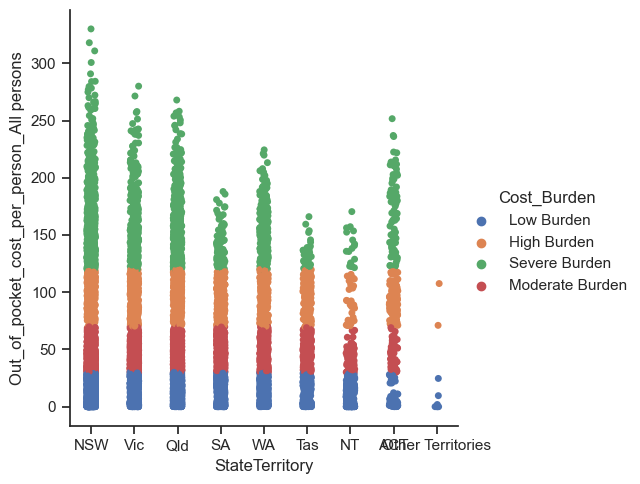

In [103]:
sns.set(style="ticks")
g = sns.catplot(
    x="StateTerritory",
    y="Out_of_pocket_cost_per_person_All persons",
    hue="Cost_Burden",
    data=df_service_level_1_new,
)

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


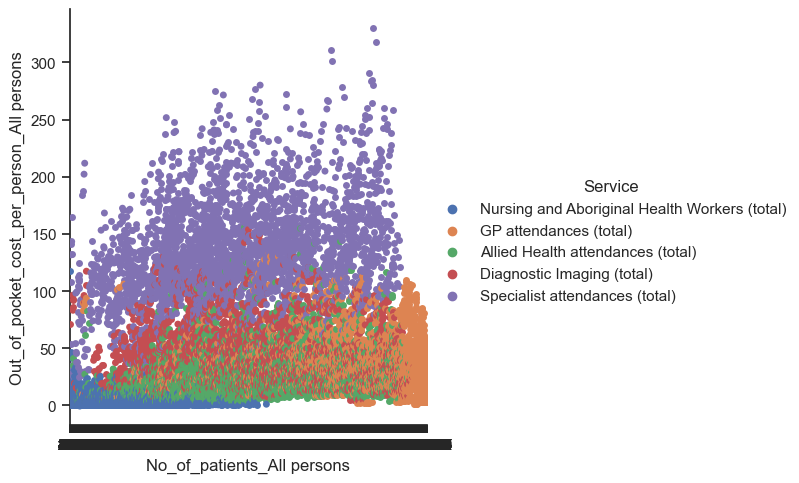

In [104]:
# Create a categorical plot in seaborn to compare no of patients using number of services a year by cost. Checking to see if there is any relationship with Cost of Burden category

sns.set(style="ticks")
g = sns.catplot(
    x="No_of_patients_All persons",
    y="Out_of_pocket_cost_per_person_All persons",
    hue="Service",
    data=df_service_level_1_new,
)

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


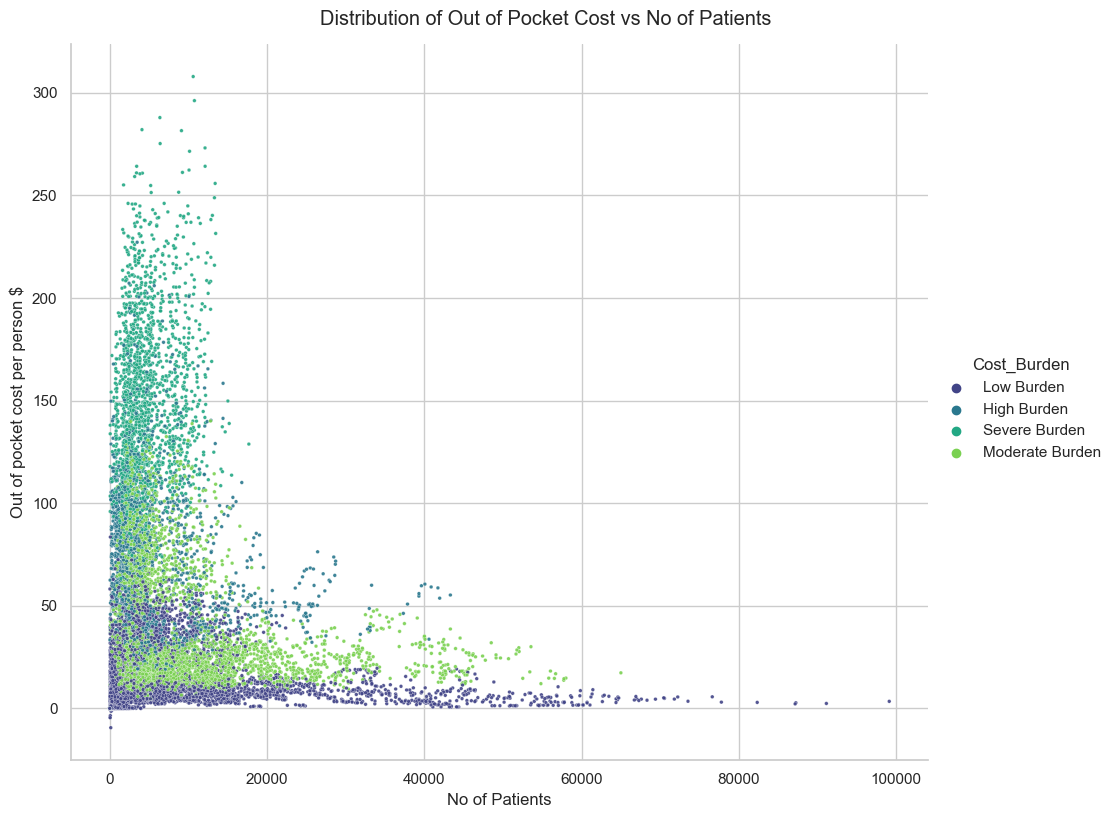

In [105]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the relplot
g = sns.relplot(
    data=df_service_level_1_new,
    x="No_of_patients_0-24",
    y="Out_of_pocket_cost_per_person_0-24",
    hue="Cost_Burden",  # This will color code by the 'Service Usage' category
    kind="scatter",  # Scatter plot (you can also try kind='line' for large data)
    palette="viridis",  # Color palette can be adjusted
    s=7,  # Size of the points, consider making this smaller if the plot is too dense
    alpha=0.9,  # Transparency of points
    height=8,  # Height of the figure in inches
    aspect=1.2,  # Aspect ratio of the figure
)

# Set the axis labels and title
g.set_axis_labels("No of Patients", "Out of pocket cost per person $")
g.figure.suptitle("Distribution of Out of Pocket Cost vs No of Patients", y=1.02)

# Show the plot
plt.show()

In [106]:
path_fig = r"/Users/patel/Documents/CF-Data Anaylst Course/portfolio_projects/mbs_analysis/analysis/"
g.savefig(os.path.join(path_fig, "cat_oop_patients.png"))

<Axes: xlabel='Total_provider_fees_$_All persons', ylabel='Out_of_pocket_cost_per_person_All persons'>

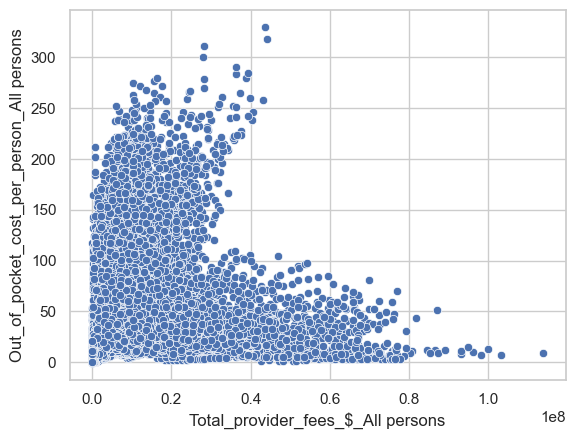

In [107]:
sns.scatterplot(
    x="Total_provider_fees_$_All persons",
    y="Out_of_pocket_cost_per_person_All persons",
    data=df_service_level_1_new,
)

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


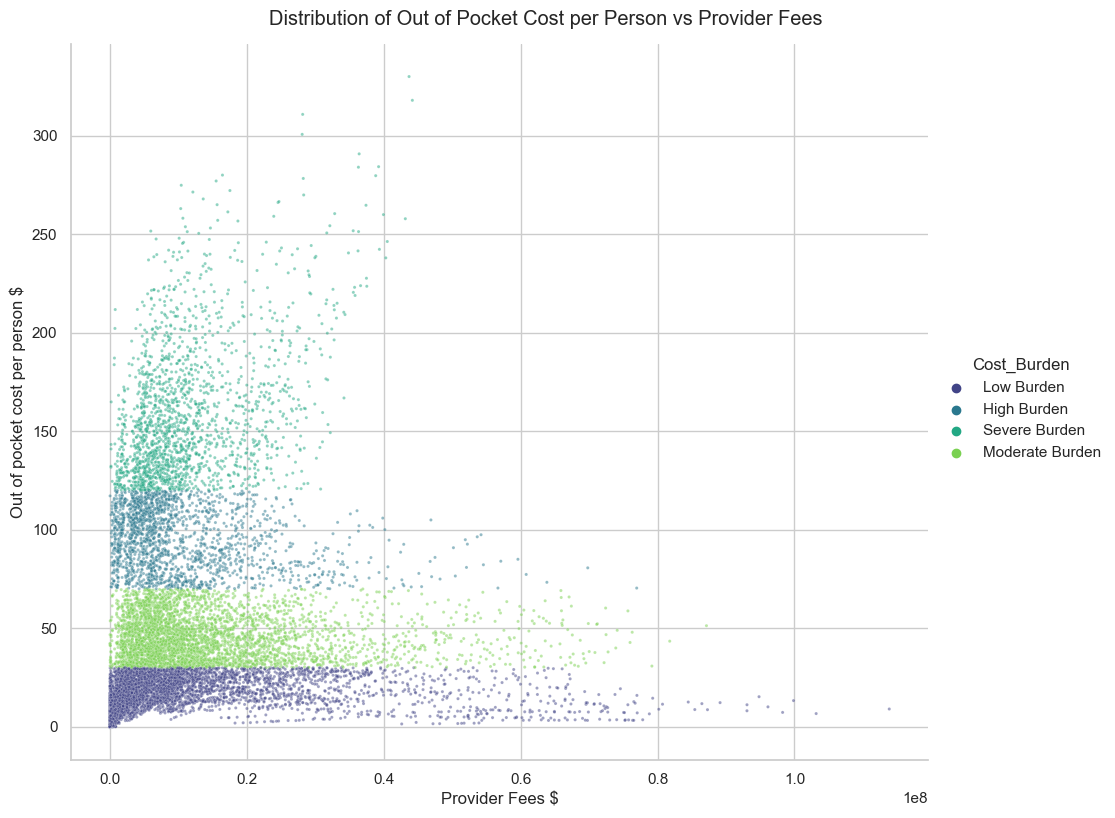

In [108]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the relplot
g = sns.relplot(
    data=df_service_level_1_new,
    x="Total_provider_fees_$_All persons",
    y="Out_of_pocket_cost_per_person_All persons",
    hue="Cost_Burden",  # This will color code by the 'Service Usage' category
    kind="scatter",  # Scatter plot (you can also try kind='line' for large data)
    palette="viridis",  # Color palette can be adjusted
    s=5,  # Size of the points, consider making this smaller if the plot is too dense
    alpha=0.5,  # Transparency of points
    height=8,  # Height of the figure in inches
    aspect=1.2,  # Aspect ratio of the figure
)

# Set the axis labels and title
g.set_axis_labels("Provider Fees $", "Out of pocket cost per person $")
g.figure.suptitle(
    "Distribution of Out of Pocket Cost per Person vs Provider Fees", y=1.02
)

# Show the plot
plt.show()

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


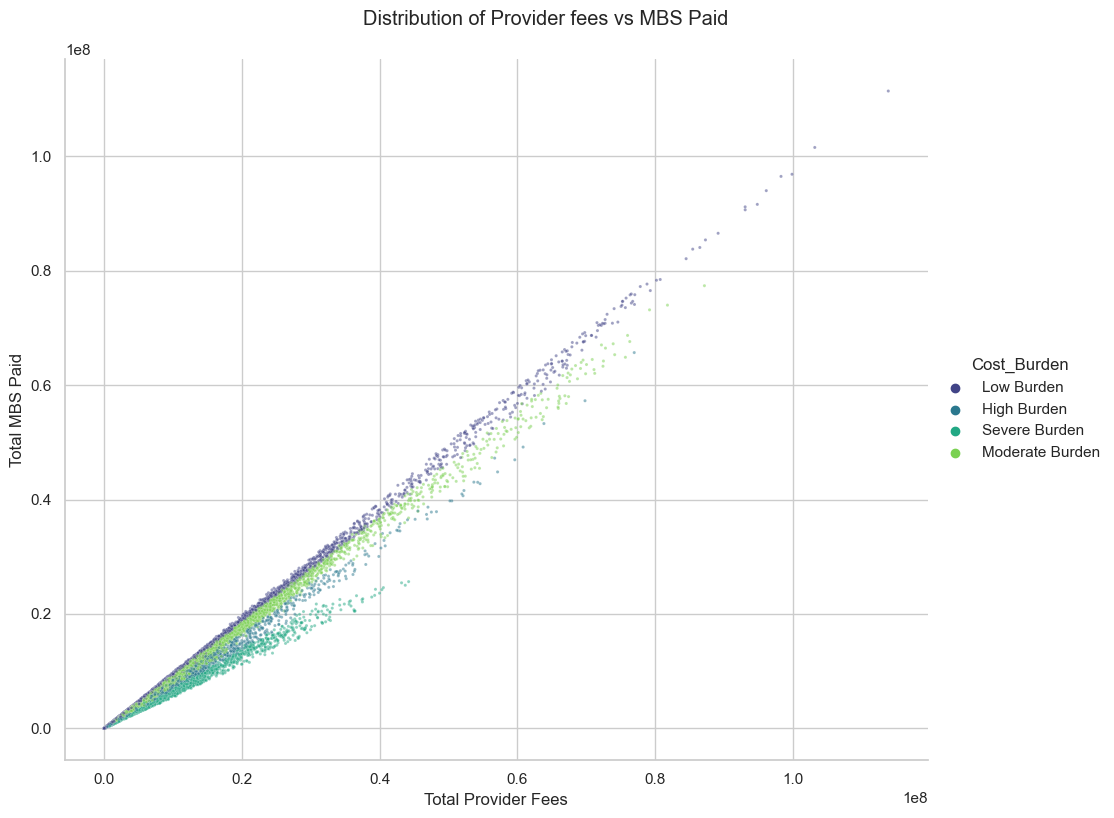

In [109]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the relplot
g = sns.relplot(
    data=df_service_level_1_new,
    x="Total_provider_fees_$_All persons",
    y="Total_mbs_paid_$_All persons",
    hue="Cost_Burden",  # This will color code by the 'Service Usage' category
    kind="scatter",  # Scatter plot (you can also try kind='line' for large data)
    palette="viridis",  # Color palette can be adjusted
    s=5,  # Size of the points, consider making this smaller if the plot is too dense
    alpha=0.5,  # Transparency of points
    height=8,  # Height of the figure in inches
    aspect=1.2,  # Aspect ratio of the figure
)

# Set the axis labels and title
g.set_axis_labels("Total Provider Fees", "Total MBS Paid")
g.figure.suptitle("Distribution of Provider fees vs MBS Paid", y=1.02)

# Show the plot
plt.show()

#### Services by Cost of Burden

In [110]:
# group by the service by burden category. calculate the sum of each service separately and join the dfs followed by % of services were low, high, moderate and severe
df_services_burden = df_service_level_1_new.groupby(
    by=["Service", "Cost_Burden"], as_index=False
).agg({"key_x": "count"})
burden_sum = df_services_burden.groupby("Service")["key_x"].sum()
df_services_burden_1 = df_services_burden.merge(burden_sum, how="left", on="Service")

In [111]:
# calcualte % of low, high, moderate and severe by service
df_services_burden_1["Burden_%"] = (
    df_services_burden_1["key_x_x"] / df_services_burden_1["key_x_y"] * 100
)
df_services_burden_1

Service      Cost_Burden  key_x_x  \
0               Allied Health attendances (total)      High Burden      107   
1               Allied Health attendances (total)       Low Burden     2011   
2               Allied Health attendances (total)  Moderate Burden      845   
3               Allied Health attendances (total)    Severe Burden       11   
4                      Diagnostic Imaging (total)      High Burden      423   
5                      Diagnostic Imaging (total)       Low Burden     1058   
6                      Diagnostic Imaging (total)  Moderate Burden     1479   
7                      Diagnostic Imaging (total)    Severe Burden       14   
8                          GP attendances (total)      High Burden      278   
9                          GP attendances (total)       Low Burden     1173   
10                         GP attendances (total)  Moderate Burden     1517   
11                         GP attendances (total)    Severe Burden        6   
12  Nursing and Aboriginal Health Workers (total)      High Burden        1   
13  Nursing and Aboriginal Health Workers (total)       Low Burden     2975   
14  Nursing and Aboriginal Health Workers (total)  Moderate Burden        6   
15                 Specialist attendances (total)      High Burden     1047   
16                 Specialist attendances (total)       Low Burden       14   
17                 Specialist attendances (total)  Moderate Burden      100   
18                 Specialist attendances (total)    Severe Burden     1812   

    key_x_y   Burden_%  
0      2974   3.597848  
1      2974  67.619368  
2      2974  28.412912  
3      2974   0.369872  
4      2974  14.223268  
5      2974  35.574983  
6      2974  49.731002  
7      2974   0.470746  
8      2974   9.347680  
9      2974  39.441829  
10     2974  51.008742  
11     2974   0.201748  
12     2982   0.033535  
13     2982  99.765258  
14     2982   0.201207  
15     2973  35.216953  
16     2973   0.470905  
17     2973   3.363606  
18     2973  60.948537

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Allied Health attendances (total)'),
  Text(1, 0, 'Diagnostic Imaging (total)'),
  Text(2, 0, 'GP attendances (total)'),
  Text(3, 0, 'Nursing and Aboriginal Health Workers (total)'),
  Text(4, 0, 'Specialist attendances (total)')])

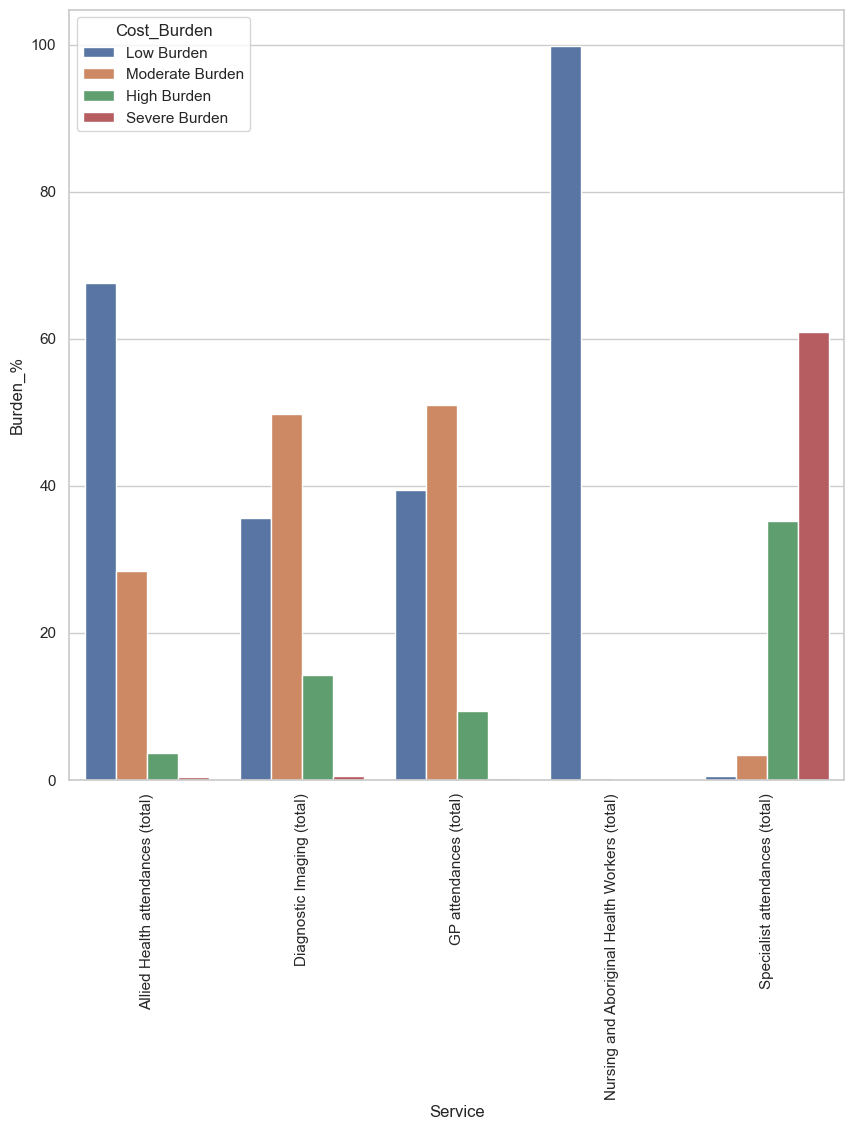

In [112]:
# barplot to see the cost of burden per service
f, ax = plt.subplots(figsize=(10, 10))
burden_barplot = sns.barplot(
    x="Service",
    y="Burden_%",
    data=df_services_burden_1,
    hue="Cost_Burden",
    hue_order=["Low Burden", "Moderate Burden", "High Burden", "Severe Burden"],
)
plt.xticks(rotation=90)

#### StateTerritory Burden

In [113]:
# group by the service by burden category. calculate the sum of each service separately and join the dfs followed by % of services were low, high, moderate and severe
df_services_state_burden = df_service_level_1_new.groupby(
    by=["StateTerritory", "Cost_Burden"], as_index=False
).agg(
    {
        "key_x": "count",
        "No_of_patients_All persons": "sum",
        "No_of_services_All persons": "sum",
        "Total_provider_fees_$_All persons": "sum",
        "Total_mbs_paid_$_All persons": "sum",
        "Out_of_Pocket_All persons": "sum",
        "Out_of_pocket_cost_per_person_All persons": "mean",
        "ERP_All persons": "sum",
    }
)
df_services_state_burden.rename(columns={"key_x": "Count"}, inplace=True)
df_services_state_burden["OOP_per_person_State"] = (
    df_services_state_burden["Total_provider_fees_$_All persons"]
    - df_services_state_burden["Total_mbs_paid_$_All persons"]
) / df_services_state_burden["No_of_patients_All persons"]

In [114]:
df_services_state_burden

StateTerritory      Cost_Burden  Count  No_of_patients_All persons  \
0                 ACT      High Burden    137                     4117522   
1                 ACT       Low Burden     74                      220088   
2                 ACT  Moderate Burden     46                      912351   
3                 ACT    Severe Burden     76                     1162900   
4                 NSW      High Burden    344                    11530180   
5                 NSW       Low Burden   2170                    70780751   
6                 NSW  Moderate Burden    886                    40991661   
7                 NSW    Severe Burden    608                    19734806   
8                  NT      High Burden     28                      127479   
9                  NT       Low Burden    278                     2054177   
10                 NT  Moderate Burden     81                     1062679   
11                 NT    Severe Burden     18                      111422   
12  Other Territories      High Burden      2                         828   
13  Other Territories       Low Burden      8                        2049   
14                Qld      High Burden    397                     8456648   
15                Qld       Low Burden   1953                    40299530   
16                Qld  Moderate Burden    888                    31338850   
17                Qld    Severe Burden    452                     8138735   
18                 SA      High Burden    199                     3976154   
19                 SA       Low Burden    561                    12731049   
20                 SA  Moderate Burden    423                    13397196   
21                 SA    Severe Burden     77                     1581392   
22                Tas      High Burden    125                     1995072   
23                Tas       Low Burden    276                     2202209   
24                Tas  Moderate Burden    244                     4737522   
25                Tas    Severe Burden     30                      400070   
26                Vic      High Burden    413                    15077465   
27                Vic       Low Burden   1251                    37805291   
28                Vic  Moderate Burden    960                    47202515   
29                Vic    Severe Burden    346                    11291145   
30                 WA      High Burden    211                     5654416   
31                 WA       Low Burden    660                    14495250   
32                 WA  Moderate Burden    419                    17541412   
33                 WA    Severe Burden    236                     5453311   

    No_of_services_All persons  Total_provider_fees_$_All persons  \
0                     19384077                       1.564118e+09   
1                       406773                       2.170042e+07   
2                      2114939                       1.800248e+08   
3                      3626653                       4.894560e+08   
4                     43569002                       4.562485e+09   
5                    382572512                       2.373916e+10   
6                    202801693                       1.504096e+10   
7                     64963807                       9.143027e+09   
8                       290378                       3.478625e+07   
9                      8066583                       4.979958e+08   
10                     4656599                       3.524966e+08   
11                      269135                       3.813384e+07   
12                        2000                       3.587500e+05   
13                       13412                       7.308550e+05   
14                    34716165                       3.142274e+09   
15                   181690667                       1.230370e+10   
16                   172592358                       1.188141e+10   
17                    24639714                       3.472091e+09   


In [115]:
df_services_state_burden["No_of_patients_All persons"] = df_services_state_burden[
    "No_of_patients_All persons"
].astype("int")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'ACT'),
  Text(1, 0, 'NSW'),
  Text(2, 0, 'NT'),
  Text(3, 0, 'Other Territories'),
  Text(4, 0, 'Qld'),
  Text(5, 0, 'SA'),
  Text(6, 0, 'Tas'),
  Text(7, 0, 'Vic'),
  Text(8, 0, 'WA')])

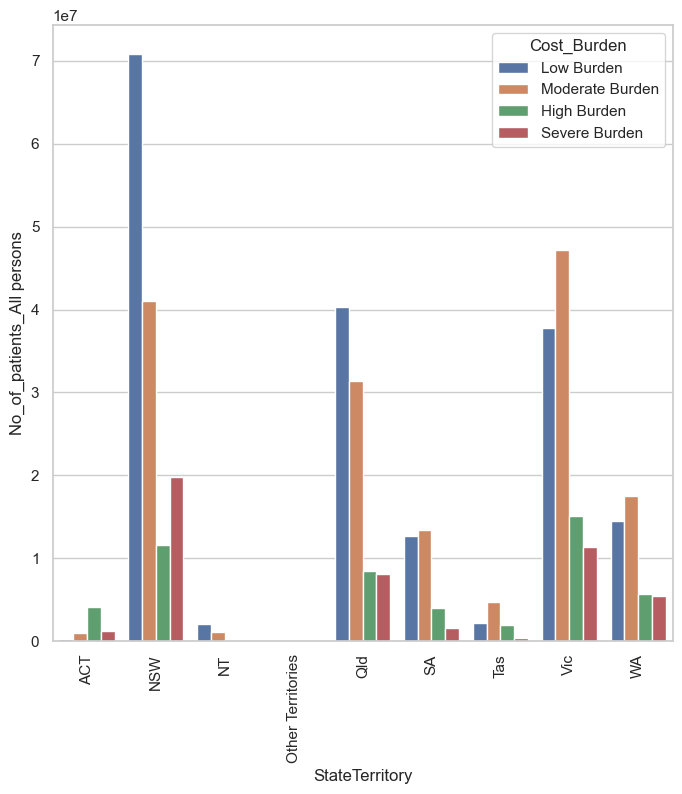

In [116]:
# barplot to see the cost of burden per service
f, ax = plt.subplots(figsize=(8, 8))
burden_barplot = sns.barplot(
    x="StateTerritory",
    y="No_of_patients_All persons",
    data=df_services_state_burden,
    hue="Cost_Burden",
    hue_order=["Low Burden", "Moderate Burden", "High Burden", "Severe Burden"],
)
plt.xticks(rotation=90)

In [117]:
total_patients = df_services_state_burden.groupby(
    by=["StateTerritory"], as_index=False
)["No_of_patients_All persons"].sum()
df_services_state_burden = df_services_state_burden.merge(
    total_patients, how="left", on="StateTerritory"
)
df_services_state_burden.rename(
    columns={"No_of_patients_All persons_y": "State_Total_Patients"}, inplace=True
)

In [118]:
df_services_state_burden["%_Patients_Burden_Type"] = (
    df_services_state_burden["No_of_patients_All persons_x"]
    / df_services_state_burden["State_Total_Patients"]
    * 100
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'ACT'),
  Text(1, 0, 'NSW'),
  Text(2, 0, 'NT'),
  Text(3, 0, 'Other Territories'),
  Text(4, 0, 'Qld'),
  Text(5, 0, 'SA'),
  Text(6, 0, 'Tas'),
  Text(7, 0, 'Vic'),
  Text(8, 0, 'WA')])

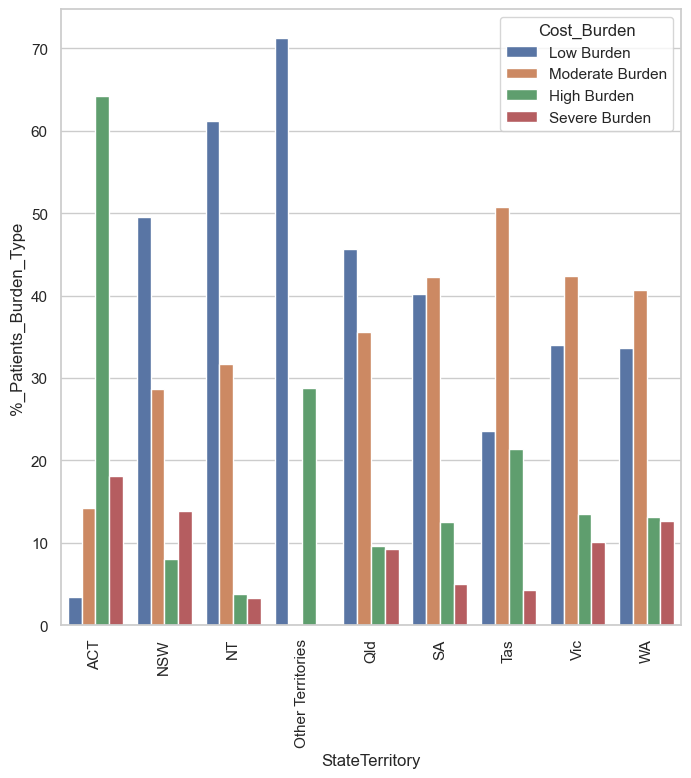

In [119]:
# barplot to see the cost of burden per service
f, ax = plt.subplots(figsize=(8, 8))
burden_barplot = sns.barplot(
    x="StateTerritory",
    y="%_Patients_Burden_Type",
    data=df_services_state_burden,
    hue="Cost_Burden",
    hue_order=["Low Burden", "Moderate Burden", "High Burden", "Severe Burden"],
)
plt.xticks(rotation=90)

### Service Usage Categorgies

In [120]:
print(df_service_level_1["No_of_service_per_person_All persons"].mean())
print("---")
print(df_service_level_1["No_of_service_per_person_All persons"].quantile(0.25))
print(df_service_level_1["No_of_service_per_person_All persons"].quantile(0.5))
print(df_service_level_1["No_of_service_per_person_All persons"].quantile(0.75))

3.3769664980218077
---
2.2316043425814236
2.6369014008765563
3.257862013035773


<Axes: xlabel='No_of_service_per_person_All persons', ylabel='Count'>

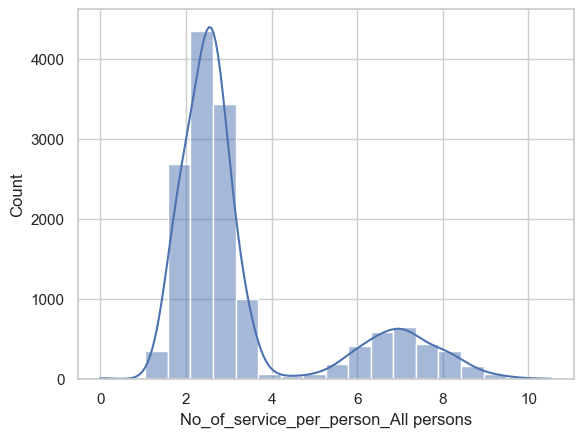

In [121]:
sns.histplot(
    df_service_level_1["No_of_service_per_person_All persons"], bins=20, kde=True
)

    Low Usage = 0-3 Services
    Moderate Usage = 3-6 Services
    High Usage = 6+ Services

In [122]:
# Low usage of Services - 0 to 3 services a year
df_service_level_1_new.loc[
    df_service_level_1_new["No_of_service_per_person_All persons"] <= 3,
    "Service_Usage",
] = "Low Usage"

# Moderate Burden between 3 to 6 services a year
df_service_level_1_new.loc[
    (df_service_level_1_new["No_of_service_per_person_All persons"] > 3)
    & (df_service_level_1_new["No_of_service_per_person_All persons"] <= 6),
    "Service_Usage",
] = "Moderate Usage"

# High usage of services - more than 6 times a year
df_service_level_1_new.loc[
    df_service_level_1_new["No_of_service_per_person_All persons"] > 6,
    "Service_Usage",
] = "High Usage"

In [123]:
df_service_level_1_new["Service_Usage"].value_counts()

Low Usage         10326
High Usage         2524
Moderate Usage     2027
Name: Service_Usage, dtype: int64

<Axes: xlabel='No_of_service_per_person_All persons', ylabel='No_of_patients_All persons'>

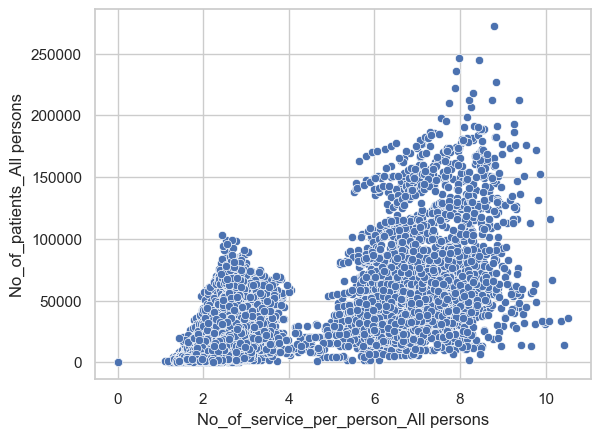

In [124]:
sns.scatterplot(
    x="No_of_service_per_person_All persons",
    y="No_of_patients_All persons",
    data=df_service_level_1_new,
)

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


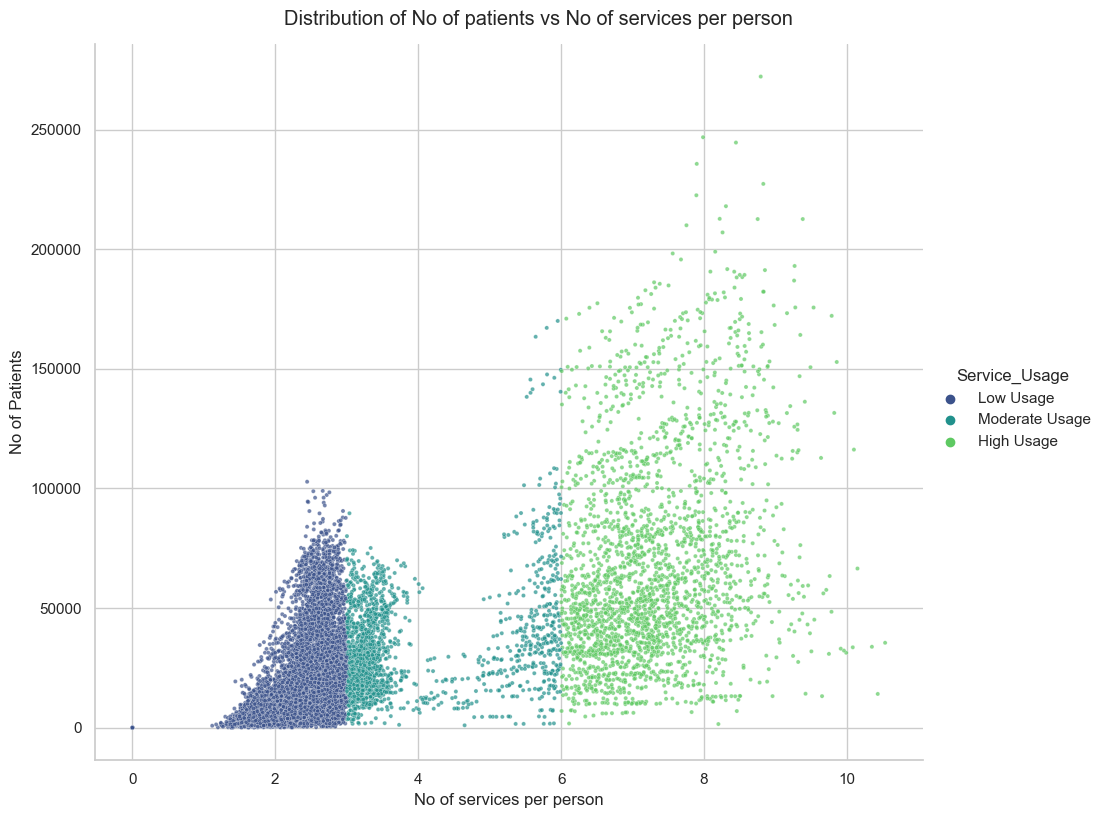

In [125]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the relplot
g = sns.relplot(
    data=df_service_level_1_new,
    x="No_of_service_per_person_All persons",
    y="No_of_patients_All persons",
    hue="Service_Usage",  # This will color code by the 'Service Usage' category
    kind="scatter",  # Scatter plot (you can also try kind='line' for large data)
    palette="viridis",  # Color palette can be adjusted
    s=9,  # Size of the points, consider making this smaller if the plot is too dense
    alpha=0.7,  # Transparency of points
    height=8,  # Height of the figure in inches
    aspect=1.2,  # Aspect ratio of the figure
)

# Set the axis labels and title
g.set_axis_labels("No of services per person", "No of Patients")
g.figure.suptitle("Distribution of No of patients vs No of services per person", y=1.02)

# Show the plot
plt.show()

Geographic Exploration

In [126]:
df_service_area = df_service_level_1_new.groupby(
    by=["GeographicGroup", "Service_Usage"], as_index=False
)["No_of_services_All persons"].count()
df_service_area

GeographicGroup   Service_Usage  No_of_services_All persons
0               Inner regional      High Usage                         666
1               Inner regional       Low Usage                        2620
2               Inner regional  Moderate Usage                         314
3    Major cities - higher SES      High Usage                         284
4    Major cities - higher SES       Low Usage                        1351
5    Major cities - higher SES  Moderate Usage                         516
6     Major cities - lower SES      High Usage                         422
7     Major cities - lower SES       Low Usage                        1399
8     Major cities - lower SES  Moderate Usage                         317
9    Major cities - medium SES      High Usage                         782
10   Major cities - medium SES       Low Usage                        2761
11   Major cities - medium SES  Moderate Usage                         642
12              Outer regional      High Usage                         316
13              Outer regional       Low Usage                        1522
14              Outer regional  Moderate Usage                          97
15  Remote (incl. very remote)      High Usage                          54
16  Remote (incl. very remote)       Low Usage                         673
17  Remote (incl. very remote)  Moderate Usage                         141

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Inner regional'),
  Text(1, 0, 'Major cities - higher SES'),
  Text(2, 0, 'Major cities - lower SES'),
  Text(3, 0, 'Major cities - medium SES'),
  Text(4, 0, 'Outer regional'),
  Text(5, 0, 'Remote (incl. very remote)')])

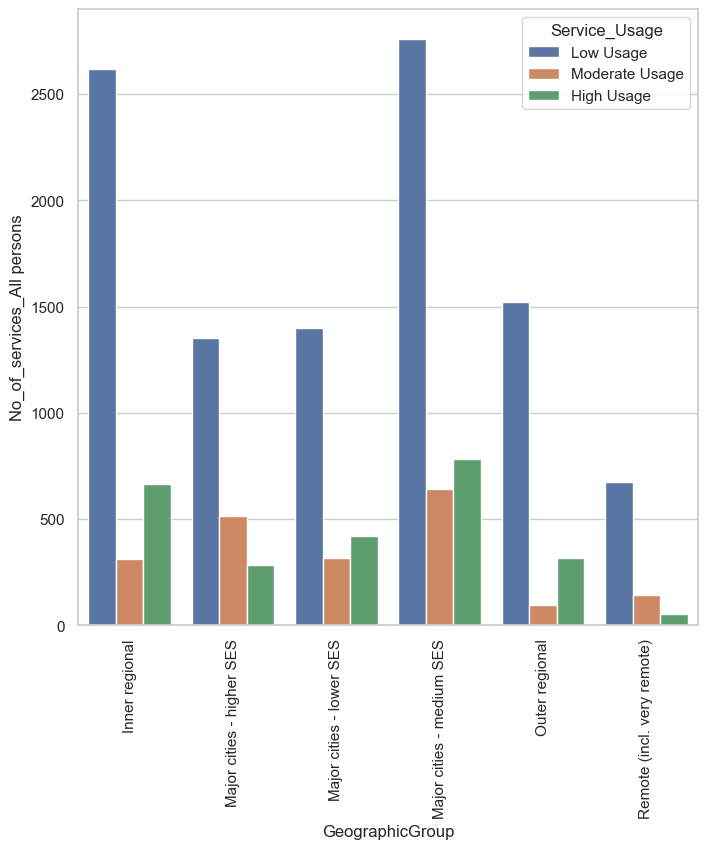

In [127]:
# barplot to see the cost of burden per service
f, ax = plt.subplots(figsize=(8, 8))
burden_barplot = sns.barplot(
    x="GeographicGroup",
    y="No_of_services_All persons",
    data=df_service_area,
    hue="Service_Usage",
    hue_order=["Low Usage", "Moderate Usage", "High Usage"],
)
plt.xticks(rotation=90)

### Service Coverage Level

Determining coverage level requried of services. This shows coverage level required in areas

In [128]:
print(df_service_level_1["%_People_had_service_All persons"].mean())
print("---")
print(df_service_level_1["%_People_had_service_All persons"].quantile(0.25))
print(df_service_level_1["%_People_had_service_All persons"].quantile(0.5))
print(df_service_level_1["%_People_had_service_All persons"].quantile(0.75))

39.2438374672313
---
24.86
35.16
42.13


<Axes: xlabel='%_People_had_service_All persons', ylabel='Count'>

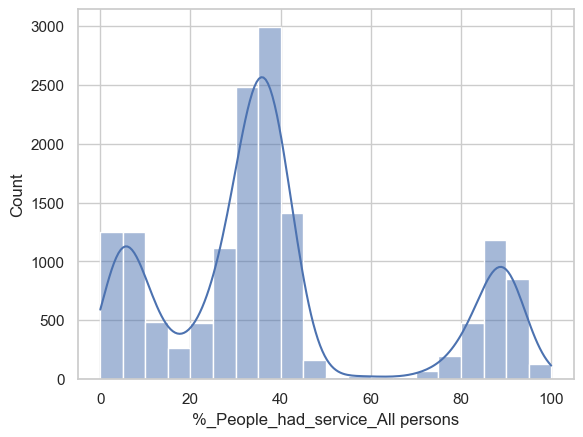

In [129]:
sns.histplot(df_service_level_1["%_People_had_service_All persons"], bins=20, kde=True)

    Low Coverage = 0-255
    Moderate Coverage = 25-50%
    High Coverage = 50-75%
    Critical Coverage = 75-100%

In [130]:
# Low Coverage - 0 to 25% used
df_service_level_1_new.loc[
    df_service_level_1_new["%_People_had_service_All persons"] <= 25,
    "Service_Coverage",
] = "Low Coverage"

# Moderate Coverge - 25 to 50% used the service
df_service_level_1_new.loc[
    (df_service_level_1_new["%_People_had_service_All persons"] > 25)
    & (df_service_level_1_new["%_People_had_service_All persons"] <= 50),
    "Service_Coverage",
] = "Moderate Coverage"

# High coverage - 50-75% used the service
df_service_level_1_new.loc[
    (df_service_level_1_new["%_People_had_service_All persons"] > 50)
    & (df_service_level_1_new["%_People_had_service_All persons"] <= 75),
    "Service_Coverage",
] = "Moderate Coverage"

# Critical Coverage - 75% require service
df_service_level_1_new.loc[
    df_service_level_1_new["%_People_had_service_All persons"] > 75,
    "Service_Coverage",
] = "Critical Coverage"

In [131]:
df_service_level_1_new["Service_Coverage"].value_counts()

Moderate Coverage    8312
Low Coverage         3738
Critical Coverage    2827
Name: Service_Coverage, dtype: int64

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


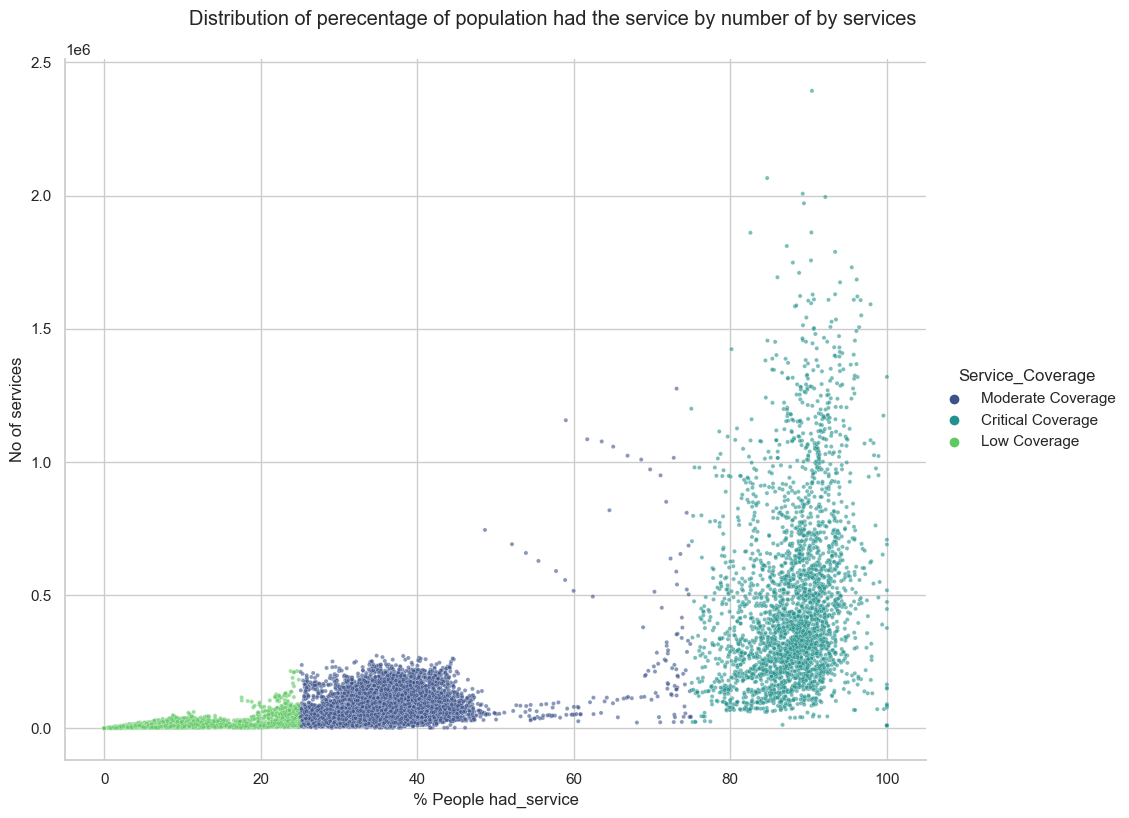

In [132]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the relplot
g = sns.relplot(
    data=df_service_level_1_new,
    x="%_People_had_service_All persons",
    y="No_of_services_All persons",
    hue="Service_Coverage",  # This will color code by the 'Service Usage' category
    kind="scatter",  # Scatter plot (you can also try kind='line' for large data)
    palette="viridis",  # Color palette can be adjusted
    s=9,  # Size of the points, consider making this smaller if the plot is too dense
    alpha=0.6,  # Transparency of points
    height=8,  # Height of the figure in inches
    aspect=1.2,  # Aspect ratio of the figure
)

# Set the axis labels and title
g.set_axis_labels("% People had_service", "No of services")
g.figure.suptitle(
    "Distribution of perecentage of population had the service by number of by services",
    y=1.02,
)

# Show the plot
plt.show()

/Users/patel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


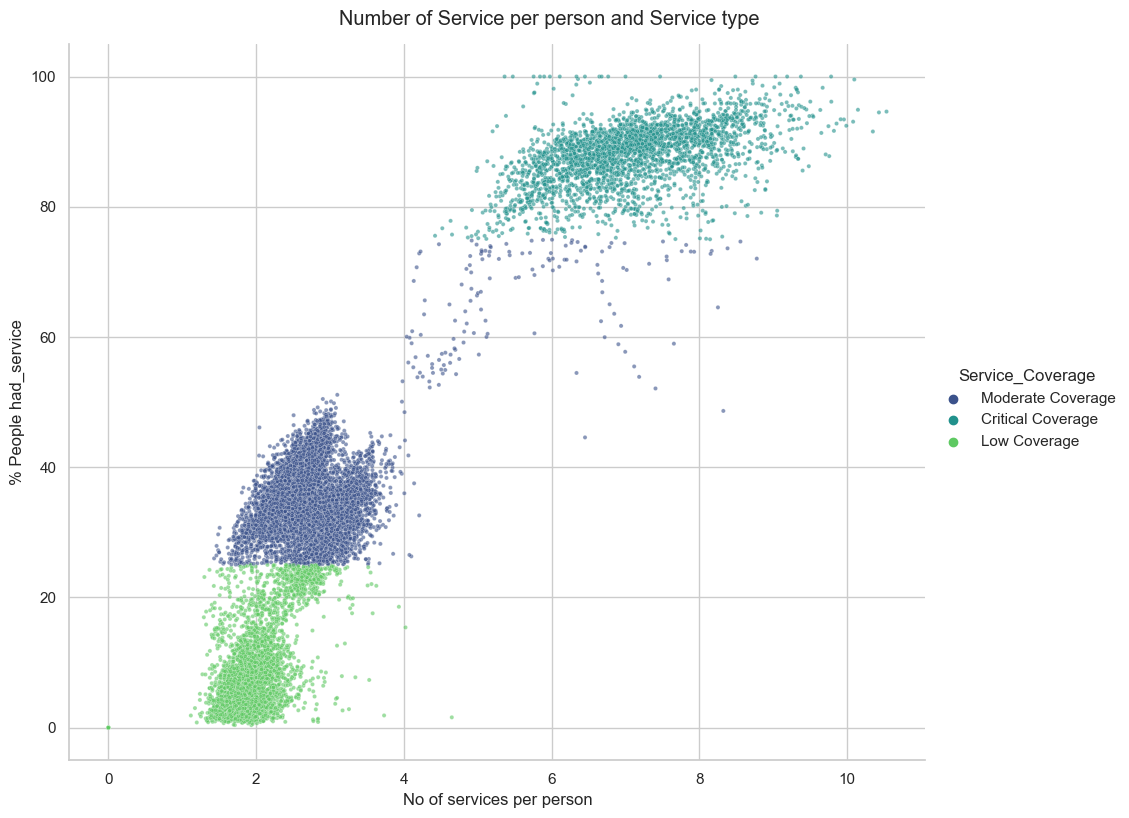

In [133]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the relplot
g = sns.relplot(
    data=df_service_level_1_new,
    x="No_of_service_per_person_All persons",
    y="%_People_had_service_All persons",
    hue="Service_Coverage",  # This will color code by the 'Service Usage' category
    kind="scatter",  # Scatter plot (you can also try kind='line' for large data)
    palette="viridis",  # Color palette can be adjusted
    s=9,  # Size of the points, consider making this smaller if the plot is too dense
    alpha=0.6,  # Transparency of points
    height=8,  # Height of the figure in inches
    aspect=1.2,  # Aspect ratio of the figure
)

# Set the axis labels and title
g.set_axis_labels("No of services per person", "% People had_service")
g.figure.suptitle("Number of Service per person and Service type ", y=1.02)

# Show the plot
plt.show()

## Summary of Findings

1. Total Provider fees, Medicare Benefit Paid and Out of Pocket $ have increased over time
2. Even though $ value have increased, overall % of Total OOP has remained the same over time. This requires further confirmation if that is the case across all services, state, age group and gender
3. % of People who use the service (Coverage) form 2 groups. 
    - GP services was used over 50% of the population.
    - Nursing & Aboriginal Health Workers was used least required, followed by Specialist service
4. GP Services was used more than 4 times on average per person per year
5. Diagnostic Imaging, Specialist, Allied Health and Nursing was used less than 4 times on average
6. Inner regional, medium and low socioeconomic major cities and outer regional had more high usage of services per person than moderate. All regions had higher percentage of low usage services per person (less than 2). 
7. ACT had significantly high burden (oop costs per person). This needs to be corresponded with avg income.


## Observations to Investigate Further

1. There are outliers in 2018-2022 of Total OOP, MBS and Provider fees that are significantly high. Is this specific service or area?
2. Investigate inner and outer regions and major cities - what the high usage services are?
3. Investigate average income population by state level. 
